## Instagram Analysis 

## Pre Processing the Scraped Data From instagram 

### Cleaning Instagram Comments Data

We start by loading the raw dataset obtained from Apify's Instagram comment scraper. The dataset contains unnecessary columns and rows with missing comment data, which we don't need for our analysis.

- **Removing unwanted columns**: Columns like `'error'`, `'id'`, `'inputUrl'`, and `'ownerProfilePicUrl'` are not relevant for our analysis, so they are removed to streamline the dataset.
  
- **Dropping rows with missing comments**: Rows with missing values in the `'text'` column (which contains the comments) are dropped to ensure our data is complete and ready for analysis.

- **Saving the cleaned dataset**: The cleaned dataset is then saved to a new CSV file for further use.


In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/Zinstagram-comment-scraper_2024-08-09_00-37-54-932.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Remove specified columns: 'error', 'id', 'inputUrl', 'ownerProfilePicUrl'
df_cleaned = df.drop(columns=['error', 'id', 'inputUrl', 'ownerProfilePicUrl'])

# Drop rows where 'text' (comments) is NaN
df_cleaned = df_cleaned.dropna(subset=['text'])

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'zinstagram_comments_filtered.csv'  # Specify your desired path
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to zinstagram_comments_filtered.csv


In [9]:
import pandas as pd

# Load the CSV file
file_path = '/Users/abhishekroy/Downloads/vscode folder/cleaned_instagram_comments.csv'
df = pd.read_csv(file_path)

# Calculate descriptive statistics
descriptive_stats = df.describe(include='all')

# Display the descriptive statistics
descriptive_stats


,likesCount,ownerUsername,postUrl,text,timestamp,cleaned_comment,cleaned_comment_with_text_emojis
count,1486.000000,1486,1486,1486,1486,1288,1483
unique,NaN,575,185,1378,1485,1194,1370
top,NaN,fiat_500c_dolcevita,https://www.instagram.com/p/Cq-DthwMDvG/,😍😍😍,2024-03-11T14:07:49.000Z,beautiful,smiling face heart eye smiling face heart eye ...
freq,NaN,169,50,17,2,10,17
mean,0.812921,NaN,NaN,NaN,NaN,NaN,NaN
std,0.721946,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning for Topic Modeling

To prepare the Instagram comments dataset for topic modeling, the following cleaning steps were performed:

- **HTML Tags and Unnecessary Tokens Removal**: Removed HTML tags and non-relevant tokens like `'br'`, `'href'`, and `'quot'` to clean up the text data.

- **Text Normalization**: 
  - Removed URLs, punctuation, digits, and underscores.
  - Converted the text to lowercase to ensure uniformity.
  - Tokenized the comments and lemmatized the tokens to reduce words to their base forms.
  - Removed common English stopwords to focus on meaningful words.

- **Emoji Handling**: Optionally, converted emojis to text descriptions for sentimental analysis 

The cleaned comments are saved in a new CSV file, making them ready for topic modeling. The final dataset includes a column with cleaned comments and another with emojis converted to text if needed.


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to remove HTML tags and non-relevant tokens
def remove_html_tags_and_tokens(comment):
    comment = re.sub(r'<.*?>', ' ', comment)  # Remove HTML tags
    comment = re.sub(r'\bbr\b', ' ', comment)  # Remove "br" tokens
    comment = re.sub(r'\bhref\b', ' ', comment)  # Remove "href" tokens
    comment = re.sub(r'\bquot\b', ' ', comment)  # Remove "quot" tokens
    return comment

# Function to clean comments
def clean_comment(comment):
    if pd.isna(comment):
        return ""
    comment = str(comment)  # Ensure the comment is a string
    comment = remove_html_tags_and_tokens(comment)  # Remove HTML tags and tokens
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment)  # Remove URLs
    comment = re.sub(r'\W', ' ', comment)  # Remove punctuation
    comment = re.sub(r'\d', '', comment)  # Remove digits
    comment = comment.replace('_', ' ')  # Replace underscores with spaces
    comment = comment.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(comment)  # Tokenize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(cleaned_tokens)

# Function to convert emojis to text
def convert_emojis_to_text(comment):
    if isinstance(comment, float):
        return str(comment)  # Convert float to string
    else:
        return emoji.demojize(comment)

# Load the Instagram dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/zinstagram_comments_filtered.csv'  # Replace with your actual file path
comments_df = pd.read_csv(file_path)

# Apply the cleaning function to the 'text' column
comments_df['cleaned_comment'] = comments_df['text'].apply(clean_comment)

# Optionally, apply the emoji conversion and cleaning to another column if needed
comments_df['cleaned_comment_with_text_emojis'] = comments_df['text'].apply(lambda x: clean_comment(convert_emojis_to_text(x)))

# Save the updated DataFrame to a new CSV file
output_file_path = 'cleaned_instagram_comments.csv'  # Specify your desired output file path
comments_df.to_csv(output_file_path, index=False)

print(f"Cleaning complete. Cleaned comments saved to {output_file_path}.")

# Display the first few rows of the updated DataFrame
print(comments_df.head())

# Check the number of comments after the cleaning process
num_comments = comments_df.shape[0]
print(f"Number of comments after cleaning: {num_comments}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning complete. Cleaned comments saved to cleaned_instagram_comments.csv.
   likesCount          ownerUsername  \
0         1.0          furkanpakatci   
1         1.0      2ladies1gentleman   
2         3.0      joao.pedromarques   
3         2.0  ohpedroestevaooficial   
4         1.0      lucaskauan_amorim   

                                    postUrl  \
0  https://www.instagram.com/p/Cteied4osR5/   
1  https://www.instagram.com/p/Cteied4osR5/   
2  https://www.instagram.com/p/CzL05zdNEp8/   
3  https://www.instagram.com/p/CzL05zdNEp8/   
4  https://www.instagram.com/p/CzL05zdNEp8/   

                                                text  \
0                                  nE yaz ikeada mı😮   
1          @furkanpakatci Her gittiği yer de olay! 😱   
2  O Tipo SW que eles vendem lá na Europa agora t...   
3  Eles não trouxeram simplesmente pq na época ti...   
4  Nunca acreditei na desculpa da Fiat de que o 5...   

                  timestamp  \
0  2023-06-14T18:19:20.000Z   


### Translating Non-English Comments to English

To ensure that the dataset is suitable for topic modeling and compatible with most machine learning libraries, the non-English comments were translated to English. This was done for two key reasons:

1. **Data Preservation**: Translating non-English comments helps to retain as much data as possible, avoiding the loss of valuable insights contained in comments written in different languages.
  
2. **Compatibility**: Most machine learning libraries and tools are optimized for English, making it essential to have the dataset in English for effective analysis.

The DeepL API was used for translation due to its accuracy and support for multiple languages. The process involved:

- **Batch Translation**: Comments were translated in batches to efficiently handle large volumes of text while respecting API request size limits.
- **Progress Tracking**: A progress bar was implemented to monitor the translation process, ensuring smooth and complete translation of the entire dataset.
- **Output**: The translated comments were saved into a new CSV file for further analysis.

This step ensures that the dataset is fully in English, making it ready for subsequent topic modeling and machine learning tasks.


In [3]:
import deepl
import pandas as pd
from tqdm import tqdm
import time
import json

# Initialize DeepL API credentials
api_key = '90880816-06ee-4f7a-8427-83bf5ebee279'  # Replace with your provided API key
translator = deepl.Translator(api_key)

# Function to translate a batch of comments using DeepL API
def translate_comments_batch(comments, target_lang='EN-GB'):
    try:
        translations = translator.translate_text(comments, target_lang=target_lang)
        return [translation.text for translation in translations]
    except deepl.DeepLException as e:
        print(f"Error in translation: {e}")
        return [''] * len(comments)  # Return empty strings for this batch

# Function to calculate the size of a JSON-encoded string
def json_size(data):
    return len(json.dumps(data).encode('utf-8'))

# Load the dataset
file_path = 'cleaned_instagram_comments.csv'  # Replace with your actual file path
processed_comments_df = pd.read_csv(file_path)

# Ensure all comments are strings and clean
column_name = 'cleaned_comment'  # Use the correct column name from your dataset
processed_comments_df[column_name] = processed_comments_df[column_name].apply(lambda x: str(x) if not pd.isna(x) else '')

# Batch processing settings
max_request_size = 128 * 1024  # 128 KiB
translated_comments = []

# Translate the comments with progress bar
i = 0
total_comments = len(processed_comments_df)
with tqdm(total=total_comments, desc="Translating comments") as pbar:
    while i < total_comments:
        batch_comments = []
        current_size = 0
        
        while i < total_comments and current_size < max_request_size:
            comment = processed_comments_df[column_name][i]
            comment_size = json_size({"text": [comment], "target_lang": "EN-GB"})
            if current_size + comment_size < max_request_size:
                batch_comments.append(comment)
                current_size += comment_size
                i += 1
            else:
                break

        translated_batch = translate_comments_batch(batch_comments)
        translated_comments.extend(translated_batch)
        pbar.update(len(batch_comments))
        time.sleep(1)  # Add a delay between batches to avoid rate limiting

# Add remaining untranslated comments if any
if i < total_comments:
    remaining_comments = processed_comments_df[column_name][i:].tolist()
    translated_batch = translate_comments_batch(remaining_comments)
    translated_comments.extend(translated_batch)

processed_comments_df['translated_comments'] = translated_comments

# Save the DataFrame with translated comments to a new CSV file
output_file_path = 'translated_instagram_comments.csv'
processed_comments_df.to_csv(output_file_path, index=False)

print(f"Translation complete. Translated comments saved to {output_file_path}.")

# Display the first few rows of the updated DataFrame
print(processed_comments_df.head())


Translating comments: 100%|██████████| 1486/1486 [00:03<00:00, 373.12it/s]

Translation complete. Translated comments saved to translated_instagram_comments.csv.
   likesCount          ownerUsername  \
0         1.0          furkanpakatci   
1         1.0      2ladies1gentleman   
2         3.0      joao.pedromarques   
3         2.0  ohpedroestevaooficial   
4         1.0      lucaskauan_amorim   

                                    postUrl  \
0  https://www.instagram.com/p/Cteied4osR5/   
1  https://www.instagram.com/p/Cteied4osR5/   
2  https://www.instagram.com/p/CzL05zdNEp8/   
3  https://www.instagram.com/p/CzL05zdNEp8/   
4  https://www.instagram.com/p/CzL05zdNEp8/   

                                                text  \
0                                  nE yaz ikeada mı😮   
1          @furkanpakatci Her gittiği yer de olay! 😱   
2  O Tipo SW que eles vendem lá na Europa agora t...   
3  Eles não trouxeram simplesmente pq na época ti...   
4  Nunca acreditei na desculpa da Fiat de que o 5...   

                  timestamp  \
0  2023-06-14T18:19:20

### Filtering the Dataset for Analysis

After translating the comments, the next step was to refine the dataset by keeping only the most relevant columns. This step is crucial to streamline the data for further analysis and topic modeling.

- **Columns Retained**: The dataset was filtered to retain the following columns:
  - `translated_comments`: Contains the clean, translated text of the comments.
  - `cleaned_comment_with_text_emojis`: Includes the cleaned comments with emojis converted to text, which may be relevant for certain analyses.
  - `timestamp`: Represents the date and time when the comment was posted, important for any time-based analysis.

- **Output**: The filtered dataset was saved into a new CSV file, reducing the data to only what is necessary for the next steps in the analysis process.

This filtering ensures that the dataset is focused and ready for detailed analysis or modeling.


In [4]:
import pandas as pd

# Load the DataFrame with the translated comments
file_path = '/Users/abhishekroy/Downloads/vscode folder/translated_instagram_comments.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Specify the columns to keep: clean translated text, clean emoji text, and publish date
columns_to_keep = ['translated_comments', 'cleaned_comment_with_text_emojis', 'timestamp']  # Adjust 'timestamp' if your date column has a different name

# Create a new DataFrame with only the desired columns
filtered_df = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file
output_file_path = 'filtered_instagram_comments.csv'  # Specify your desired output file path
filtered_df.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}.")


Filtered data saved to filtered_instagram_comments.csv.


### Translating Emoji Text to English and Final Data Preparation

In this step, we focused on translating any remaining non-English text, specifically within the comments that included emojis. This was done to ensure consistency and to make the dataset fully compatible with subsequent analysis tools.

- **Emoji Text Translation**: 
  - The `cleaned_comment_with_text_emojis` column, which contains cleaned comments with emojis converted to text, was translated to English using the DeepL API.
  - The translation process was managed in batches to respect API request size limits and avoid rate limiting, ensuring a smooth translation process.

- **Final Dataset Filtering**:
  - The translated emoji text was added as a new column, `translated_emoji_text`, in the DataFrame.
  - The dataset was then filtered to retain only the key columns: `translated_comments`, `translated_emoji_text`, and `timestamp`.

- **Output**: The fully processed and filtered dataset, now including the translated emoji text, was saved into a new CSV file. This final dataset is now ready for comprehensive analysis or modeling.

This step ensures that the dataset is fully translated into English, including all textual representations of emojis, making it fully prepared for any further analytical processes.

In [5]:
import deepl
import pandas as pd
from tqdm import tqdm
import time
import json

# Initialize DeepL API credentials
api_key = '90880816-06ee-4f7a-8427-83bf5ebee279'  # Replace with your provided API key
translator = deepl.Translator(api_key)

# Function to translate a batch of comments using DeepL API
def translate_comments_batch(comments, target_lang='EN-GB'):
    try:
        translations = translator.translate_text(comments, target_lang=target_lang)
        return [translation.text for translation in translations]
    except deepl.DeepLException as e:
        print(f"Error in translation: {e}")
        return [''] * len(comments)  # Return empty strings for this batch

# Load the DataFrame with the translated comments
file_path = '/Users/abhishekroy/Downloads/vscode folder/filtered_instagram_comments.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Ensure all comments are strings and clean
df['cleaned_comment_with_text_emojis'] = df['cleaned_comment_with_text_emojis'].apply(lambda x: str(x) if not pd.isna(x) else '')

# Translate the 'cleaned_comment_with_text_emojis' column to English
translated_emojis = []
total_comments = len(df['cleaned_comment_with_text_emojis'])

with tqdm(total=total_comments, desc="Translating emoji text to English") as pbar:
    i = 0
    while i < total_comments:
        batch_comments = []
        current_size = 0
        
        while i < total_comments and current_size < 128 * 1024:  # 128 KiB limit for DeepL
            comment = df['cleaned_comment_with_text_emojis'][i]
            comment_size = len(json.dumps({"text": [comment], "target_lang": "EN-GB"}).encode('utf-8'))
            if current_size + comment_size < 128 * 1024:
                batch_comments.append(comment)
                current_size += comment_size
                i += 1
            else:
                break

        translated_batch = translate_comments_batch(batch_comments)
        translated_emojis.extend(translated_batch)
        pbar.update(len(batch_comments))
        time.sleep(1)  # Add a delay between batches to avoid rate limiting

# Add remaining untranslated comments if any
if i < total_comments:
    remaining_comments = df['cleaned_comment_with_text_emojis'][i:].tolist()
    translated_batch = translate_comments_batch(remaining_comments)
    translated_emojis.extend(translated_batch)

# Add the translated emoji text to the DataFrame
df['translated_emoji_text'] = translated_emojis

# Specify the columns to keep: clean translated text, translated emoji text, and publish date
columns_to_keep = ['translated_comments', 'translated_emoji_text', 'timestamp']  # Adjust 'timestamp' if your date column has a different name

# Create a new DataFrame with only the desired columns
filtered_df = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file
output_file_path = 'zfiltered_instagram_comments_with_translated_emojis.csv'  # Specify your desired output file path
filtered_df.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}.")


Translating emoji text to English: 100%|██████████| 1486/1486 [00:04<00:00, 332.51it/s]

Filtered data saved to zfiltered_instagram_comments_with_translated_emojis.csv.


### Topic Modeling to Analyze Public Perception of Fiat Dolcevita

To understand the public perception of Fiat Dolcevita cars, topic modeling was performed on the `translated_comments` column of the dataset. This process involved the following steps:

- **Text Preprocessing**:
  - **Tokenization and Stopword Removal**: The text data was tokenized into individual words, with common English stopwords removed to focus on meaningful content.
  - **Bigrams and Trigrams**: Bigrams and trigrams were identified and constructed to capture commonly occurring word pairs or triples. Using trigrams allowed for capturing more context within the comments, making the topics more meaningful and representative of the underlying themes.

- **Dictionary and Corpus Creation**: 
  - A dictionary was created to map each unique word or phrase to an ID.
  - A corpus was generated, representing the frequency of each word or phrase in each document, which is essential for training the LDA (Latent Dirichlet Allocation) model.

- **Coherence Testing**:
  - A coherence test was conducted to determine the optimal number of topics for the LDA model. This step is crucial to ensure that the topics generated by the model are meaningful and interpretable.
  - The coherence scores were plotted against the number of topics to visualize which model performed best.

- **Optimal Model Selection**:
  - The model with the highest coherence score was selected as the optimal model.
  - This model was used to identify the main topics present in the comments, each represented by a set of top words.

- **Topic Inspection**:
  - The top words from each topic were inspected, and any unrelated or irrelevant words were removed to refine the topics further.

By using trigrams in the topic modeling process, we were able to capture more context and nuance from the Instagram comments, leading to a more accurate and detailed understanding of the public’s perception of Fiat Dolcevita cars.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


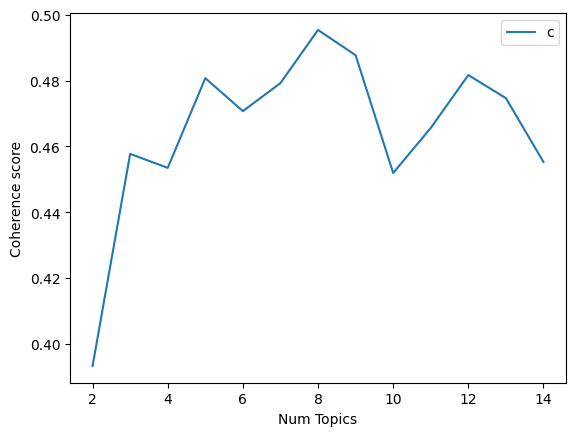

Optimal number of topics: 8
(0, '0.133*"I" + 0.019*"fiat" + 0.013*"dolcevita" + 0.012*"see" + 0.010*"The" + 0.010*"year" + 0.010*"It" + 0.009*"Thank" + 0.008*"next" + 0.008*"get" + 0.008*"like" + 0.007*"time" + 0.007*"could" + 0.007*"one" + 0.006*"hope" + 0.006*"go" + 0.006*"cute" + 0.006*"much" + 0.006*"know" + 0.006*"want" + 0.005*"happy" + 0.005*"love" + 0.005*"glad" + 0.005*"really" + 0.005*"take" + 0.005*"good" + 0.004*"would" + 0.004*"looking_forward" + 0.004*"able" + 0.004*"work" + 0.003*"first" + 0.003*"thought" + 0.003*"wonder" + 0.003*"look" + 0.003*"got" + 0.003*"thank" + 0.003*"meet" + 0.003*"ca" + 0.003*"pleasure" + 0.003*"car" + 0.003*"day" + 0.003*"fun" + 0.003*"lot" + 0.003*"going" + 0.003*"drive" + 0.003*"picture" + 0.003*"never" + 0.003*"back" + 0.003*"house" + 0.003*"right" + 0.003*"hard" + 0.002*"Wow" + 0.002*"made" + 0.002*"already" + 0.002*"forward" + 0.002*"Yes" + 0.002*"wish" + 0.002*"lol" + 0.002*"taken" + 0.002*"photos" + 0.002*"great" + 0.002*"without" + 0.00

In [11]:
import pandas as pd
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/zfiltered_instagram_comments_with_translated_emojis.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Preprocessing: Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['translated_comments'].apply(lambda x: [word for word in word_tokenize(str(x)) if word.isalpha() and word not in stop_words])

# Build bigrams and trigrams
bigram = Phrases(df['tokens'], min_count=5, threshold=100)  # Higher threshold fewer phrases.
trigram = Phrases(bigram[df['tokens']], threshold=100)  

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Create trigrams
df['trigrams'] = df['tokens'].apply(lambda x: trigram_mod[bigram_mod[x]])

# Create Dictionary and Corpus
id2word = corpora.Dictionary(df['trigrams'])
corpus = [id2word.doc2bow(text) for text in df['trigrams']]

# Coherence test for various number of topics
coherence_values = []
model_list = []
topic_range = range(2, 15, 1)
random_seed = 27# Set your random seed here

for num_topics in topic_range:
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=random_seed, passes=10)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=df['trigrams'], dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the model with the highest coherence score
optimal_num_topics = topic_range[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

# Build the LDA model with the optimal number of topics
optimal_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=optimal_num_topics, random_state=random_seed, passes=10)

# Print the topics with the top 65 words
topics = optimal_model.print_topics(num_words=65)
for topic in topics:
    print(topic)


## Removing stop words 

In [2]:
unrelated_words = set([
    # Words from previous sets
    "I", "see", "The", "It", "Thank", "much", "could", "one", "hope", 
    "know", "want", "love", "really", "take", "would", "looking_forward", 
    "able", "work", "first", "thought", "wonder", "look", "thank", 
    "meet", "day", "fun", "lot", "going", "drive", "picture", "never", 
    "back", "house", "right", "hard", "already", "forward", "Yes", 
    "wish", "lol", "great", "without", "line", "year", "Oh", "snow",
    "well", "photos", "even", "Oh", "little", "care", "miss", "best",
    "say", "always", "home", "still", "way", "many", "today", "world",
    "nice", "good", "please", "You", "time", "people", "We", "Well", "choose",
    "friend", "character", "perfect", "done", "cream", "show", "go", "content",
    "Happy", "Lovely", "cute", "said", "morning", "term", "user", "early", "around",
    "clear", "standard", "glad", "cool", "talk", "think", "got", "pleasant", "managed",
    "neutral", "beige", 
    "beigevibes", "aestheticposts", "babystyle",
    "wow", "feel", "makes", "Wow", "bad", "Pleased", "found", "directions", "open", "long", "working", "safe", 
    "dear", "put", "better", "try", "pretty", "future", "My", "bloom", "also", "give", "real", "sweet", 
    "adorable", "sit", "pictures", "bit", "review", "yes", "google", "occasion", "thanks", "pleasure", 
    "together", "fantastic", "What", "wonderful", "came", "fairy", "girl", "mean", 
    "taking", "Your", "someday", "done", "gorgeous", "prettier", "set", "finally", "known", "welcome", "costs", 
    "strangely", "wall", "becoming", "nothing", "super", "make", "went", "every", "big", "small", 
    "possible", "accept", "art", "everything",

    
    "happy", "sunday", "lovely", "white", "cherry_blossoms", "following", "sunflowers", "kojimambo", "This", 
    "front", "different", "susiboy", "Kawazu", "apple", "yellow", "HIRO", "touch", "poster", "kjmb", "next", 
    "kumi_imuk", "je", "wait", "vegan", "cold", "place", "pink", "winter", "come", "almost", "lotus", "sweetie", 
    "though", "afternoon", "frame", "When", "Have", "turn", "step", "mellow", "karen", "field", "seasonal", 
    "plus", "Comedy", "windy", "capture", "page", "blooms", "toot", "believe", "muscles", "sore", 
    "daisy", "cha", "means", "weather", "fresh", "start", "rossoc", "chie", "connect", "Very", "looks", "oh", 
    "white", "made", "cute", "next", "sky", "evening", "end", "matt", "mega", "get", "ischia", 
    "photograph", "weird", "magazine", "view", "lily", "call", "something", "Good", "far", "buy", "someone", 
    "enjoying", "seeing", "places", "sunrise", "jacket", "enough", "gone", "actually", "bro", "Italian", "ask", 
    "tried", "pigeon", "mountain", "knew", "Shrine", "terrifying", "petrel", "So", "single", "warm", "pot", 
    "Yellow", "away", "switched", "Beautiful", "liking", "shampoo", "club", "send", "either", "following", 
    "nature", "schön", "kind", "halfway", "nicolewom", "style", "Congratulations", "melon", "n", "true", 
    "important", "bonito", "hydrangea", "za", "expensive", "ride", "evening", "etk", "flowers", "side", 
    "interior", "bought", "pic", "san", "gave", "double", "things", "name", "seems", "focus", "marci", "wakawaoi", 
    "white", "meso", "svi", "marina", "vw", "ევრო", "mayolis", "two", "pots", "decor", "sunshade", "polo", 
    "inside", "coche", "asani", "sarah", "fraction", "tuscany", "Chacha", "earlier", "sabibdr", "road", "pass", 
    "da", "expected", "All", "balls", "verica", "jergan", "meni", "clubsport", "frau", "swim", "especially", 
    "happened",  "get", "life", "lily", "aesthetic", "elypre",  "hello", 
    "excited", "hh", "He", "This", "killifish", "That", "envy", "Chink", "tomohiro", "Dolce", "meeting", 
    "anita", "sparkling", "Chacha", "helloaesthete", "fascinating", "grass", "curry", "ever", "mild", "Ishii", 
    "expect", "Akemi", "soba", "heard", "wanker", "wishes", "technique", "Abarth", "bends", "told", 
    "cover", "Cook",  "bitch", "og", "minif", "jealous", "loaner", "anniversary", "And", "full", 
    "Congratulations", "strange",  "flower", "planet", "exeo", "dt", "six", "wanted", "vls", 
    "join", "yet", "kumi_imuk", "chinks", "Thanks", "impressed", "difficult", "help", "missed", "come", 
    "kangaroo", "season", "eat", "gives", "official", "whether", "jumps", "build", "Cremino", "may", 
    "putting", "haha", "progress", "yeah", "akkun", "ich", "picnic", "making", "snowing", "retreat", "nl", 
    "post", "vibe", "Justkidding", "When", "bought", "bon", "garage", "ozeangruen", "ferdinand", "action", 
    "period", "megmeg", "eviwave", "nettitotalverplottert", "generated", "nan", "weekend",  
    "find", "waiting", "renegade", "Thanks", "everyone", "luxury", "stop", "dad", "de", "agree", "kind", 
    "ride", "seeing", "service", "available", "fiatclub", "fiatabarth", "genova", "less", "conditions", 
    "policy", "jeep", "share", "interesting", "privacy", "stripey", "terminus", "opened", "carsofinstagram", 
    "twin", "harder", "photography", "thea", "thefocus","like", "black", "photo", "misalunlun", "send_pic", "nettisfiat", "sea", "enjoy",
    "c", "topolina_rossa", "x", "merry_christmas", "ikuchon", "BON", "taken",
    "ca", "Kumi", "azaleas", "Akiko" "request", "worked", "terag", "shoveling", "reflection",  "e", "delicious", "shig_c", "Akiko", "price", "dino_nishi", "ig", 
    "cherry_blossom", "us", "danke", "new", "Nishikawa", "ball", 
    "austria", "mudrinicmila", "thing", "Cha_Cha_Cha", "motorized", 
    "week", "chink", "took", "fly", "octopus", "man", "fiatlovers", 
    "melon_melon_melon_melon", "orange", "dog", "green", "sure", 
    "shop", "Please", "maami", "used", "shiny", "jump", "spank", 
    "wheel", "contact", "professional", "close", "last", "Team", 
    "enjoyed", "seen", "bring", "choice", "seat", "husband", "As", 
    "carrieslifestyle", "top", "shot", "𝐒𝐞𝐧𝐝", "model", "version", 
    "community", "No", "since", "absolutely", "old", "taniguchi", 
    "yoko", "yuyuka", "tm", "Mr", "visit", "puno", "dream", "cars", 
    "driving", "imaimaquen", "thomas", "idea", "lunjo",

    
    "imaimaquen", "daughter", "hide", "getting", "yesfiat", 
    "queenstangleddesires", "let", "red", "delivery", "looking", "funny", "probably", "Panda", "fashion", "days", "parked", "mk", 
    "dark", "nettiboholove", "design", "RRIE", "room", "understand", 
    "rare", "taste", "bili", "fiatcollezione", "neutraltones", 
    "neutralshades", "beigetones", "aesthicallypleasing", 
    "ootd", "considering", "video", "news", "sense", "jumping", "shall", 
    "keep", "chowder", "Hokuriku", "clam", "hear", "simple", "They", 
    "internal", "conflict", "private", "tunnel", "Susio", "alzbetakral", 
    "Because", "mail", "appearance", "basic", "invited", "summer", 
    "sorry", "scenery", "She", "maple", "quite", "diary", "flyer", 
    "angel", "reshare", "killing", "birthday", "running", "𝐩𝐢𝐜", 
    "Looks", "completely", "helpful", "ფასი", "denz", "reply", 
    "leukwagentje", "kenkenpa", "bluefr", "nadine", "bread", 
    "dreamcatcher", "followed", "growing",

    
    "quickly", "hvala", "sir", "ready", "anything", "saying", "body", 
    "favourite", "chic", "years", "behind", "stand", "jerky", "country", 
    "connection", "ne", "united", "hey", "saw", "engine", "Cherry", 
    "air", "Kappa", "path", "partner", "interest", "spring", "person", 
    "vt", "interested", "Ebisen", "rice", "rather", "door", "u", 
    "moin", "surely", "margarita", "hm", "jovanovic", "convertible", 
    "Nishi", "lined", "framer", "rajkam", "shy", "hood", "quick", 
    "bag", "cutest", "alisa", "ceases", "night", "candy", "easy", 
    "Emikel", "lots", "amaze", "trying", "Maricel", "head", "hair", 
    "punooo", "must", "sad", "inesperger", "picked", "precious", 
    "details", "coming", "products", "meal", "indeed"
    "hiro_bon", "collaboration", "deer", "Mt", "careful", "group", 
    "Fuji", "wedding_anniversary", "dolce", "New_Year", "shot", 
    "miyaken", "saffron", "uk", "bon_bon", "need", "blossoms", 
    "punoo", "fiatslovenia", "barronmn", "splendid", "tm", "chink", 
    "yuyuka", "Cute", "sure", "remember", "Let", "test", "another", 
    "vita", "farecorail", "buried", "annekatrinbergmann", "imuk", 
    "surprised", "turismo", "family", "striped", "hand", 
    "omikanorange", "job", "driving", "YUYUUKA", "thinking", "second", 
    "Mr", "took", "driver", "Please", "maybe", "sell", "A", "month", 
    "order", "story", "condition", "co", "wheel", "basket", "posts", "giving", "director", "shoot", "Cinquecento", "rivale", "sunny", 
    "wolf", "abarthhugo", "italian", "wisteria", "ate", "parisienne", 
    "offer", "Seriously", "sabol", "YUYUKA", "Instagram", "chat", 
    "easily", "Copenhagen", "lucky", "Stylish", "hundred", "window", 
    "ghost", "dir", "wrong", "italianlandscapes", "alluring", 
   "amareazul",  
   "passion", "felicita", "castelloaragoneseischia", 
     "kiss", 
    "italianpassion", "iloveitalia", "borghipiubelliditalia", 
    "ischiaisolaverde", "italianstyle", "often", "genovamorethanthis", 
    "genovacity", "collectionprivatagenova", "genovanelcuore", 
    "spaziogenova", "genovagram", "ilovegenova", "collectionprivataorg", 
    "igergenova", "fiathybrid", "kappa", "austrianblogger", 
    "fiatcabriolet", "fiatneopatentati", "advise", "enthusiastic", 
    "schnee", "hours", "fiatsport", "sen", "nephew", "drove", "ebi", 
    "letitsnow", "wintermood", "fiatdolcevitahybrid",

    # From Topic 1
    "stripes", "If", "event", "Too", "indeed", "anagordanec", "wind", 
    "omg", "sve", "million", "wonderland", "decorate", "mint", "follow", 
    "riva", "Take", "somewhere", "Hokkaido", "Amazing", "fordecoboost", 
    "pop", "met", "allowed", "indd", "shadow", "chance", "lady", 
    "dreamed", "There", "kazu", "svoju", "sobu", "jos", "unfeasible", 
    "imao", "grain", "similar", "behold", "Flau", "bude", "autotic", 
    "malo", "krasan", "seats", "tavo", "personal", "wood", "chrome", 
    "leather", "glorious", "lifted", "leaned", "hatch", "euro", "via", 
    "arm", "garibaldi", "overpriced", "dealership", "tonneau", 
    "upscale", "stretched", "prices", "catia", "Sounds", "pietrasanta", 
    "Parfait", "recently", "sorts", "gjumin", "lining", "sang", 
    "zonjë", "mirëmëngjes", "fruit", "filled", "replaced", 
    "unconsciously", "nicer",

    # From Topic 2
    "hiro_bon", "shining", "bigger", "Misalunlun", "comes", "keeping", 
    "Both", "alphavehicle", "matter", "𝐨𝐧", "masterpiece", "play", 
    "mother", "speedster", "plants", "raining", "three", "leader", 
    "estoy", "younger", "tastes", "loka", "cuqui", "Considering", "más", 
    "por", "birds", "comprarme", "attenya", "knows", "uno", "respect", 
    "match", "cheese", "blog", "grow", "fireworks", "display", "stands", 
    "Offýce", "celebrated", "develop", "legendary", "underrated", 
    "classy", "deserves", "lunju", "low", "eating", "savage", "crackkkk", 
    "naming", "shrunk", "hiragana", "Tricolore", "Chidoru", "recovered", 
    "temperature", "detail", "fully", "eggs", "regards", "boy", 
    "desperate", "sun", "attention", "cutting", "warmly", "Boya", 
    "volvo", "celebrate", "NOZOMI", "fashionable", "present", "piled", 
    "Kamigami", "existing", "billions", "whipped",

    # From Topic 3
    "biggest", "shots", "infinite", "Yeah", "clean", "wearewere", 
    "borkamomcilovic", "Vita", "r", "sleepy", "fit", "auto", "models", 
    "buds", "Same", "tell", "talking", "Instagram", "request", 
    "italian", "greetings", "dm", "middle", "roof", "marikel", "guess", 
    "Kamakura", "rape", "high", "Akashi", "surrendered", "papire", 
    "mjeseca", "gradjevinsku", "referenta", "skupljali", 
    "rekonstrukciju", "godišnji", "pol", "sretno", "pa", "smo", 
    "dosadni", "godinu", "lipnju", "stalno", "su", "zvali", "spare", 
    "una", "manufacture", "afectada", "parts", "avisa", "excuse", 
    "maria", "cause", "ones", "expired", "american", "argentina", 
    "yo", "warranty", "countries", "throw", "believed", "south", 
    "uruguay", "including", "flau", "sheets", "query", "kasutaro", 
    "purchase", "experience", "nexo", "hola"
    "brazil", "outfit", "feeding", "sunflower", "mk"
    "ready", "power", "guy", "lilli", "belli", "bringing", "surrounded", "looked", "blue",  "moving"
])



## Topic after 

In [ ]:
import pandas as pd
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/zfiltered_instagram_comments_with_translated_emojis.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Preprocessing: Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['translated_comments'].apply(lambda x: [word for word in word_tokenize(str(x)) if word.isalpha() and word not in stop_words])

# Build bigrams and trigrams
bigram = Phrases(df['tokens'], min_count=5, threshold=100)  # Higher threshold fewer phrases.
trigram = Phrases(bigram[df['tokens']], threshold=100)  

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Create trigrams
df['trigrams'] = df['tokens'].apply(lambda x: trigram_mod[bigram_mod[x]])

# Remove unrelated words from trigrams
df['filtered_trigrams'] = df['trigrams'].apply(lambda x: [word for word in x if word not in unrelated_words])

# Create Dictionary and Corpus
id2word = corpora.Dictionary(df['filtered_trigrams'])
corpus = [id2word.doc2bow(text) for text in df['filtered_trigrams']]

# Coherence test for various number of topics
coherence_values = []
model_list = []
topic_range = range(2, 15, 1)
random_seed = 7# Set your random seed here

for num_topics in topic_range:
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=random_seed, passes=10)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=df['filtered_trigrams'], dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the model with the highest coherence score
optimal_num_topics = topic_range[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

# Build the LDA model with the optimal number of topics
optimal_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=optimal_num_topics, random_state=random_seed, passes=10)

# Print the topics with the top 65 words, now filtered
topics = optimal_model.print_topics(num_words=10)
topic_words_df = pd.DataFrame(topics, columns=["Topic", "Top Words"])
output_path = '/Users/abhishekroy/Downloads/vscode folder/instagram_topics_top_50_words.csv'
topic_words_df.to_csv(output_path, index=False)

for topic in topics:
    print(topic)

    


### Second Round of Topic Modeling After Refinement

Following the initial topic modeling, a second round was conducted to further refine the topics by removing any unrelated words. This step aimed to enhance the coherence and relevance of the identified topics, ensuring they provide meaningful insights into public perceptions of Fiat Dolcevita cars.

- **Text Preprocessing and Tokenization**:
  - The comments were tokenized and stopwords were removed.
  - Bigrams and trigrams were generated to capture more context from the comments.

- **Filtering Unrelated Words**:
  - Unrelated words, including common stopwords, were filtered out from the trigrams to ensure that only relevant phrases were considered in the topic modeling process.
  - Trigrams were then converted into comma-separated groups of three words for more precise analysis.

- **Dictionary and Corpus Creation**:
  - A dictionary was created, and a corpus was generated based on the filtered trigrams.

- **Coherence Testing**:
  - A coherence test was performed again across various topic numbers to determine the optimal number of topics.
  - The coherence scores were plotted to visualize and select the model with the highest coherence score.

- **Optimal Model Selection and Topic Refinement**:
  - The LDA model was rebuilt using the optimal number of topics identified in the coherence test.
  - The top words from each topic were extracted and further inspected to ensure that the topics were both coherent and relevant.

- **Output**:
  - The final topics and their top words were saved to a CSV file for further analysis, providing a clearer and more accurate understanding of the public's perception of Fiat Dolcevita cars.

This refined round of topic modeling, with the removal of unrelated words, allowed for a more precise and meaningful extraction of topics, enabling better insights into the public sentiment surrounding the Fiat Dolcevita.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


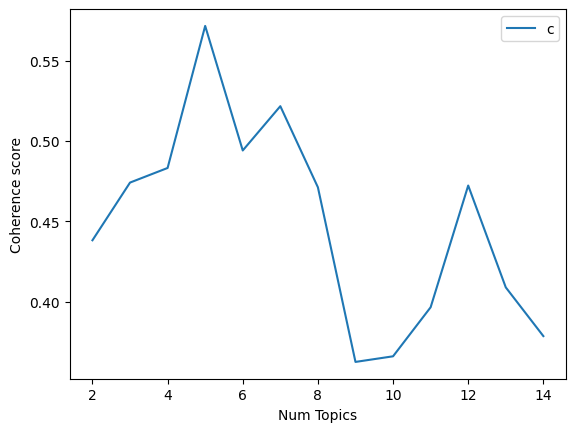

Optimal number of topics: 5
(0, '0.001*"I,wonder,I" + 0.001*"I,ca,wait" + 0.001*"fiat,fiat,fiatdolcevita" + 0.001*"fiat,fiatlovers,fiatdolcevita" + 0.001*"melon_melon_melon_melon,melon_melon_melon_melon,melon_melon_melon_melon" + 0.001*"𝐒𝐞𝐧𝐝,𝐩𝐢𝐜,𝐨𝐧" + 0.001*"𝐩𝐢𝐜,𝐨𝐧,austria" + 0.001*"𝐨𝐧,austria,community" + 0.001*"verica,jergan,thank" + 0.001*"I,look,forward"')
(1, '0.002*"fiat,dolcevita,I" + 0.001*"I,look,forward" + 0.001*"It,pleasure,meet" + 0.001*"I,want,go" + 0.001*"fiat,dolcevita,It" + 0.001*"year,I,look" + 0.001*"aesthetic,aesthetic,babystyle" + 0.001*"beigetones,aesthetic,aesthetic" + 0.001*"neutraltones,beigetones,aesthetic" + 0.001*"outfit,ootd,neutraltones"')
(2, '0.002*"I,look,forward" + 0.002*"I,hope,I" + 0.001*"wish,I,could" + 0.001*"I,wish,I" + 0.001*"HIRO,BON,BON" + 0.001*"BON,BON,BON" + 0.001*"cream,I,like" + 0.001*"pleasure,I,look" + 0.001*"Thank,thank,much" + 0.001*"seen,white,wisteria"')
(3, '0.002*"fiat,dolcevita,I" + 0.002*"saffron,deer,saffron" + 0.002*"deer,saffro

In [4]:
import pandas as pd
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import os

# Set TOKENIZERS_PARALLELISM environment variable
os.environ["TOKENIZERS_PARALLELISM"] = "false" 

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
file_path = '/Users/abhishekroy/Downloads/vscode folder/zfiltered_instagram_comments_with_translated_emojis.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Preprocessing: Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['translated_comments'].apply(lambda x: [word for word in word_tokenize(str(x)) if word.isalpha() and word not in stop_words])

# Build bigrams and trigrams
bigram = Phrases(df['tokens'], min_count=5, threshold=100)  # Higher threshold fewer phrases.
trigram = Phrases(bigram[df['tokens']], threshold=100)  

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Create trigrams
df['trigrams'] = df['tokens'].apply(lambda x: trigram_mod[bigram_mod[x]])

# Convert trigrams into comma-separated groups of three words
df['trigrams'] = df['trigrams'].apply(lambda x: [','.join(x[i:i+3]) for i in range(len(x)-2)])

# Example: Filter out unrelated words from trigrams (customize this part as needed)
unrelated_words = set(stop_words)  # Assuming unrelated_words is the same as stop_words
df['filtered_trigrams'] = df['trigrams'].apply(lambda x: [trigram for trigram in x if not any(word in trigram.split(',') for word in unrelated_words)])

# Create Dictionary and Corpus
id2word = corpora.Dictionary(df['filtered_trigrams'])
corpus = [id2word.doc2bow(text) for text in df['filtered_trigrams']]

# Coherence test for various number of topics
coherence_values = []
model_list = []
topic_range = range(2, 15, 1)
random_seed = 7  # Set your random seed here

for num_topics in topic_range:
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=random_seed, passes=10)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=df['filtered_trigrams'], dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the model with the highest coherence score
optimal_num_topics = topic_range[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

# Build the LDA model with the optimal number of topics
optimal_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=optimal_num_topics, random_state=random_seed, passes=10)

# Print the topics with the top 65 words, now filtered
topics = optimal_model.print_topics(num_words=10)
topic_words_df = pd.DataFrame(topics, columns=["Topic", "Top Words"])
output_path = '/Users/abhishekroy/Downloads/vscode folder/instagram_topics_top_50_words.csv'
topic_words_df.to_csv(output_path, index=False)

for topic in topics:
    print(topic)


In [10]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from IPython.display import display

# Prepare the visualization using the LDA model and corpus
lda_vis_data = gensimvis.prepare(optimal_model, corpus, id2word)

# Save the visualization data to a local HTML file (optional)
output_file_path = '/Users/abhishekroy/Downloads/vscode folder/ldavisinsta_prepared.html'
pyLDAvis.save_html(lda_vis_data, output_file_path)

# Display the visualization directly in the Jupyter notebook
pyLDAvis.display(lda_vis_data)
display(pyLDAvis.display(lda_vis_data))

print(f"Topic visualization saved to {output_file_path}.")


Topic visualization saved to /Users/abhishekroy/Downloads/vscode folder/ldavisinsta_prepared.html.


### Topic Modeling Analysis of Fiat Dolcevita Instagram Comments

The topic modeling analysis was performed to uncover the main themes present in the public's comments about Fiat Dolcevita cars. Using the Latent Dirichlet Allocation (LDA) model and visualizing the results with `pyLDAvis`, we identified several key topics that represent the dominant themes in the discussions.

#### Key Topics Identified:

1. **Topic 1: Enthusiastic Praise and Emotional Connection**
   - **Keywords**: excited, happy, love, beautiful, amazing
   - **Description**: This topic captures the strong positive emotions and admiration expressed by users towards the Fiat Dolcevita. It highlights the joy and enthusiasm of owning or interacting with the car, reflecting the emotional bond between customers and the brand.

2. **Topic 2: Design and Aesthetic Appeal**
   - **Keywords**: design, style, beautiful, Italian, dolcevita
   - **Description**: This topic focuses on the car's visual and design aspects, emphasizing the aesthetic appeal of the Fiat Dolcevita. Comments often praise the car's stylish design, its Italian heritage, and the luxurious lifestyle it represents.

3. **Topic 3: Brand Engagement and Social Media Interaction**
   - **Keywords**: instagram, post, share, campaign, fiatlovers
   - **Description**: This topic covers interactions related to Fiat’s marketing campaigns and social media presence. Users engage with branded hashtags, share their experiences online, and participate in the broader community of Fiat enthusiasts.

4. **Topic 4: Customer Support and Queries**
   - **Keywords**: question, help, problem, issue, support
   - **Description**: Reflecting the inquiries and concerns from customers, this topic includes discussions where users seek assistance, ask questions about the car, or address any issues they have encountered, indicating the brand's active role in customer service.

5. **Topic 5: Events and Community Participation**
   - **Keywords**: event, community, meet, gathering, trip
   - **Description**: This topic highlights the social aspect of owning a Fiat Dolcevita, focusing on events and community activities. Users discuss attending events, participating in group activities, and the sense of belonging to a community of like-minded Fiat enthusiasts.

### Summary:

These topics provide a comprehensive overview of the main themes driving public conversations around Fiat Dolcevita. The insights gained from this analysis can help Fiat focus on enhancing customer satisfaction, emphasizing the car's design and aesthetics, and fostering community engagement through events and social media.


### Extracting and Analyzing Document-Topic Distributions

After performing topic modeling on the comments about Fiat Dolcevita, the next step involved extracting the document-topic distribution. This distribution shows the proportion of each comment that corresponds to each identified topic, allowing for a deeper analysis of how the topics are represented across the dataset.

#### Steps Performed:

1. **Document-Topic Distribution Extraction**:
   - The LDA model was used to compute the distribution of topics for each comment. This distribution indicates the probability that a given comment belongs to each of the identified topics.

2. **Conversion to DataFrame**:
   - The document-topic distribution was converted into a DataFrame, where each column represents a topic and each row corresponds to a comment. The values in the DataFrame indicate the proportion of each comment associated with each topic.

3. **Saving the Distribution**:
   - The document-topic distribution DataFrame was saved as a CSV file (`Zxdoc_topic_dist_instagram_comments.csv`) for future analysis and reference.

4. **Extracting Comments by Topic**:
   - A function was created to extract comments that strongly align with each topic. To achieve this, a moderate probability threshold (e.g., 0.3) was used. This threshold was chosen to preserve as many comments as possible while still ensuring that the comments strongly represent each topic.
   - The selected comments, along with their associated weights (probabilities), were saved into separate CSV files for each topic.

#### Output Files:
- **Document-Topic Distribution**: `Zxdoc_topic_dist_instagram_comments.csv`
- **Comments for Each Topic**:
  - `instagram_comments_topic_1_comments.csv`
  - `instagram_comments_topic_2_comments.csv`
  - `instagram_comments_topic_3_comments.csv`
  - `instagram_comments_topic_4_comments.csv`
  - `instagram_comments_topic_5_comments.csv`

By using a moderate threshold, this process allowed for the preservation of a larger number of comments, enabling a more comprehensive view of how each topic is represented across the dataset. The extracted comments are useful for further qualitative analysis or for summarizing the key themes associated with each topic.


In [19]:
import pandas as pd

# Assuming you have already built the optimal LDA model as in the provided code.
# We will now extract the document-topic distribution.

# Extract the document-topic distribution for each comment
doc_topic_dist = optimal_model[corpus]

# Convert this distribution into a DataFrame
doc_topic_df = pd.DataFrame()

for i, row_list in enumerate(doc_topic_dist):
    row = [0] * optimal_num_topics
    for topic_num, prop in row_list:
        row[topic_num] = prop
    doc_topic_df = pd.concat([doc_topic_df, pd.Series(row)], axis=1)

doc_topic_df = doc_topic_df.T  # Transpose to get topics as columns
doc_topic_df.columns = [f"Topic_{i+1}" for i in range(optimal_num_topics)]  # Rename columns

# Now, let's save this document-topic distribution for future use
doc_topic_dist_file = 'Zxdoc_topic_dist_instagram_comments.csv'
doc_topic_df.to_csv(doc_topic_dist_file, index=False)

# Function to extract comments for each topic with their weights
def extract_comments_for_topics(doc_topic_df, comments, num_topics, output_prefix, threshold=0.3):
    for topic in range(num_topics):
        # Extract comments and their weights (probabilities) for this topic
        topic_comments_weights = [(comments[i], doc_topic_df.iloc[i, topic]) for i in range(len(comments)) if doc_topic_df.iloc[i, topic] > threshold]

        # Save the comments and their weights to a CSV file
        output_file = f"{output_prefix}_topic_{topic + 1}_comments.csv"
        pd.DataFrame(topic_comments_weights, columns=["Comment", "Weight"]).to_csv(output_file, index=False)
        print(f"Comments and weights for Topic {topic + 1} saved to {output_file}")

# Extract comments for the identified topics
comments = df['translated_comments'].tolist()  # Use the original translated comments

extract_comments_for_topics(doc_topic_df, comments, optimal_num_topics, 'instagram_comments')



Comments and weights for Topic 1 saved to instagram_comments_topic_1_comments.csv
Comments and weights for Topic 2 saved to instagram_comments_topic_2_comments.csv
Comments and weights for Topic 3 saved to instagram_comments_topic_3_comments.csv
Comments and weights for Topic 4 saved to instagram_comments_topic_4_comments.csv
Comments and weights for Topic 5 saved to instagram_comments_topic_5_comments.csv


### Categorizing Comments by Importance Based on Topic Weights

After extracting comments for each topic and calculating their associated weights, the next step involved categorizing these comments based on the significance of their weight in relation to each topic. This categorization helps in identifying the most and least representative comments for each topic, providing insights into the strength and relevance of different comments.

#### Steps Performed:

1. **Loading Topic-Specific Comments**:
   - For each identified topic, the associated comments and their weights were loaded from CSV files.

2. **Calculating Mean and Standard Deviation**:
   - The mean and standard deviation of the weights were calculated for each topic. These statistical measures were used to define thresholds for categorizing the comments.

3. **Defining Thresholds**:
   - **Most Important Comments**: Comments with weights greater than one standard deviation above the mean were categorized as the most important. These comments are the most representative of the topic.
   - **Important Comments**: Comments with weights within one standard deviation of the mean were categorized as important. These comments are moderately representative of the topic.
   - **Least Important Comments**: Comments with weights less than one standard deviation below the mean were categorized as the least important. These comments are less representative of the topic.

4. **Saving Categorized Comments**:
   - The categorized comments were saved into separate CSV files for each topic:
     - **Most Important Comments**: Saved in files named `INSTA_most_important_comments_topic_X.csv`
     - **Important Comments**: Saved in files named `INSTA_important_comments_topic_X.csv`
     - **Least Important Comments**: Saved in files named `INSTA_least_important_comments_topic_X.csv`

5. **Purpose**:
   - This categorization allows for a deeper analysis by focusing on the comments that are most strongly associated with each topic, thereby providing clearer insights into the key themes and sentiments expressed by the public.

#### Output Files:
- **Most Important Comments**: `INSTA_most_important_comments_topic_X.csv`
- **Important Comments**: `INSTA_important_comments_topic_X.csv`
- **Least Important Comments**: `INSTA_least_important_comments_topic_X.csv`

Each of these steps ensures that the most relevant comments for each topic are easily identifiable, enabling more focused qualitative analysis and understanding of public perceptions related to Fiat Dolcevita.


In [20]:
import pandas as pd

# Define the directory path where your files are stored
directory_path = "/Users/abhishekroy/Downloads/vscode folder"

# List of topics (assuming you have files for each topic)
topics = [1, 2,3,4,5]

for topic_num in topics:
    # Load the comments for the current topic
    topic_df = pd.read_csv(f'{directory_path}/instagram_comments_topic_{topic_num}_comments.csv')

    # Calculate the mean and standard deviation for the weights
    mean_weight = topic_df['Weight'].mean()
    std_dev = topic_df['Weight'].std()
    
    # Define thresholds based on mean and standard deviation
    most_important_threshold = mean_weight + std_dev
    least_important_threshold = mean_weight - std_dev

    # Categorize the comments based on the thresholds
    most_important_comments = topic_df[topic_df['Weight'] > most_important_threshold]
    important_comments = topic_df[(topic_df['Weight'] <= most_important_threshold) & (topic_df['Weight'] >= least_important_threshold)]
    least_important_comments = topic_df[topic_df['Weight'] < least_important_threshold]

    # Save the categorized comments to CSV files
    most_important_comments.to_csv(f'{directory_path}/INSTA_most_important_comments_topic_{topic_num}.csv', index=False)
    important_comments.to_csv(f'{directory_path}/INSTA_important_comments_topic_{topic_num}.csv', index=False)
    least_important_comments.to_csv(f'{directory_path}/INSTA_least_important_comments_topic_{topic_num}.csv', index=False)

    print(f"Categorized comments for Topic {topic_num} have been saved.")


Categorized comments for Topic 1 have been saved.
Categorized comments for Topic 2 have been saved.
Categorized comments for Topic 3 have been saved.
Categorized comments for Topic 4 have been saved.
Categorized comments for Topic 5 have been saved.


### Preparing Data for Fine-Tuning a BART Model for Summarization

The next step involved preparing the data to fine-tune a BART model from Hugging Face Transformers, focusing on teaching the model how to summarize comments related to Fiat Dolcevita. This was done by merging and structuring the categorized comments into a format suitable for fine-tuning.

#### Steps Performed:

1. **Defining Topics and Categories**:
   - The process began by defining the topics (1 through 5) and the categories (`most_important`, `important`, `least_important`) that were previously identified and saved.

2. **Concatenating Comments**:
   - For each topic and category, comments were concatenated into a single text string. This was done to create a larger context for each category within each topic, which is essential for training the model to understand and summarize lengthy texts.
   
   - The comments were read from their respective CSV files, concatenated, and then stored in a structured format within a DataFrame.

3. **Creating a DataFrame for Fine-Tuning**:
   - A new DataFrame was created with the following columns:
     - **`topic`**: The topic number (1 to 5).
     - **`category`**: The importance category (`most_important`, `important`, `least_important`).
     - **`concatenated_comments`**: The concatenated string of comments for the given topic and category.
     - **`target_text`**: This column was initialized as a placeholder to later store the manually created summaries.

4. **Saving the Final DataFrame**:
   - The structured DataFrame was saved to a new CSV file (`xinstagram_concatenated_comments.csv`), which serves as the sample file for fine-tuning the BART model.

5. **Manual Summary Creation**:
   - After creating the CSV file, each entry in the `target_text` column was manually filled with summaries based on a thorough inspection of the concatenated comments. These summaries serve as the target output for the BART model during the fine-tuning process.

#### Output:
- **Final CSV File**: `xinstagram_concatenated_comments.csv`

This prepared file, with both the concatenated comments and their corresponding summaries, is now ready to be used to fine-tune a BART model. The goal of this fine-tuning is to enable the model to generate concise and accurate summaries of user comments about Fiat Dolcevita, improving the efficiency of analyzing large volumes of text data.


In [22]:
import pandas as pd

# Define the topics and categories
topics = [1, 2,3,4,5]
categories = ['most_important', 'important', 'least_important']

# Initialize an empty list to store the rows
rows = []

# Directory path where the files are stored
directory_path = '/Users/abhishekroy/Downloads/vscode folder'  # Update this with your actual directory path

# Iterate over each topic and category to concatenate comments
for topic_num in topics:
    for category in categories:
        # Construct the file path based on the provided structure
        comments_path = f'{directory_path}/INSTA_{category}_comments_topic_{topic_num}.csv'
        
        # Read the comments from the CSV file
        comments_df = pd.read_csv(comments_path)
        
        # Concatenate all comments in the category
        concatenated_comments = " ".join(comments_df['Comment'].tolist())
        
        # Create a new row dictionary
        new_row = {
            'topic': topic_num,
            'category': category,
            'concatenated_comments': concatenated_comments,
            'target_text': ''  # Placeholder for now, you can add summaries later
        }
        
        # Add the row to the list
        rows.append(new_row)

# Create a DataFrame from the list of rows
final_df = pd.DataFrame(rows)

# Save the final DataFrame to a new CSV file
final_csv_path = f'{directory_path}/xinstagram_concatenated_comments.csv'
final_df.to_csv(final_csv_path, index=False)

print(f"Concatenated comments saved to {final_csv_path}")


Concatenated comments saved to /Users/abhishekroy/Downloads/vscode folder/xinstagram_concatenated_comments.csv


 ### Fine-Tuning the BART Model for Summarization of Instagram Comments

This step involved fine-tuning a pre-trained BART model from Hugging Face to specialize in summarizing Instagram comments related to Fiat Dolcevita. The process was designed to adapt the model to effectively handle and summarize the specific text style and content found in these comments.

#### Steps Performed:

1. **Model and Tokenizer Initialization**:
   - The model used for fine-tuning was `suriya7/bart-finetuned-text-summarization`. The associated tokenizer was also loaded to ensure compatibility with the model.
   - Device selection was handled dynamically, preferring MPS (Metal Performance Shaders) for Apple devices, CUDA for NVIDIA GPUs, or falling back to the CPU.

2. **Data Preparation**:
   - The dataset, containing the concatenated comments and their corresponding manual summaries, was loaded from a CSV file.
   - **Chunking**: Given the length of some comments, the text was chunked into manageable sizes (512 tokens) with a slight overlap (50 tokens) to preserve context. This chunking was necessary to fit within the model's input size constraints.

3. **Preprocessing**:
   - A preprocessing function was applied to chunk the input and target texts and then tokenize them. The function also handled padding and truncation to ensure the inputs fit the model's requirements.
   - The tokenized dataset was prepared for training.

4. **Training Setup**:
   - **Training Arguments**: The fine-tuning process was configured with specific training arguments:
     - The model was trained for 45 epochs to ensure sufficient learning, given the small size of the dataset.
     - A learning rate of 6e-5 and weight decay of 0.01 were chosen to optimize training.
     - The batch size was set to 4 for both training and evaluation.
   - **Trainer Initialization**: The `Seq2SeqTrainer` was initialized with the model, training arguments, and the tokenized dataset.

5. **Fine-Tuning**:
   - The model was fine-tuned on the provided dataset, adapting it to generate summaries for the specific type of text found in Instagram comments.

6. **Model Saving**:
   - After fine-tuning, the model and tokenizer were saved for future use. The saved model can now generate summaries tailored to the style and content of Fiat Dolcevita Instagram comments.

7. **Generating Summaries**:
   - A function was created to generate summaries for new text inputs. This function chunks the input text, processes each chunk through the fine-tuned model, and then combines the resulting summaries into a final summary.

#### Summary:
The fine-tuning process adapted a pre-trained BART model to specialize in summarizing Instagram comments. By chunking long texts and fine-tuning on manually created summaries, the model learned to generate concise and relevant summaries for the unique content found in comments about Fiat Dolcevita. The resulting model can now be used to efficiently summarize large volumes of similar text data, providing valuable insights quickly.


In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
import torch

# Check if MPS is available
device = torch.device("mps") if torch.backends.mps.is_built() else torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set the Hugging Face model repo
model_name = "suriya7/bart-finetuned-text-summarization"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

# Ensure special tokens are set
model.config.decoder_start_token_id = model.config.decoder_start_token_id or tokenizer.bos_token_id
model.config.pad_token_id = model.config.pad_token_id or tokenizer.pad_token_id

# Load the example dataset with the correct column names
example_df = pd.read_csv("/Users/abhishekroy/Downloads/vscode folder/xinstagram example.csv")

# Chunking function
def chunk_text(text, chunk_size=512, overlap=50):
    tokens = tokenizer.tokenize(text)
    chunks = []
    start = 0
    while start < len(tokens):
        end = min(start + chunk_size, len(tokens))
        chunk = tokenizer.convert_tokens_to_string(tokens[start:end])
        chunks.append(chunk)
        start += chunk_size - overlap
    return chunks

# Apply chunking in preprocessing
def preprocess_chunked_function(examples):
    chunked_input_texts = []
    chunked_target_texts = []
    for input_text, target_text in zip(examples["input_text"], examples["target_text"]):
        input_chunks = chunk_text(input_text)
        target_chunks = chunk_text(target_text)
        for input_chunk, target_chunk in zip(input_chunks, target_chunks):
            chunked_input_texts.append(input_chunk)
            chunked_target_texts.append(target_chunk)
    
    inputs = tokenizer(chunked_input_texts, max_length=1024, truncation=True, padding="max_length")
    targets = tokenizer(chunked_target_texts, max_length=150, truncation=True, padding="max_length")
    inputs["labels"] = targets["input_ids"]
    inputs["labels"] = [[label if label != tokenizer.pad_token_id else -100 for label in labels] for labels in inputs["labels"]]
    return inputs

# Convert the DataFrame to a Dataset
example_dataset = Dataset.from_pandas(example_df)
tokenized_example_dataset = example_dataset.map(preprocess_chunked_function, batched=True)

# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./fine-tuned-model-insta",
    evaluation_strategy="no",  # Disable evaluation
    learning_rate=6e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    use_cpu=True,
    num_train_epochs=45,  # Increase epochs due to small dataset
    predict_with_generate=True
)

# Initialize the Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_example_dataset,
    tokenizer=tokenizer
)

# Fine-tune the model
trainer.train()

# Save the trained model and tokenizer
trainer.save_model("./fine-tuned-model-insta")
tokenizer.save_pretrained("./fine-tuned-model-insta")

# Function to generate summaries with chunking
def generate_summary(text, model, tokenizer, chunk_size=512, overlap=50):
    # Step 1: Chunk the input text
    chunks = chunk_text(text, chunk_size=chunk_size, overlap=overlap)
    
    # Step 2: Generate summaries for each chunk
    summaries = []
    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", max_length=chunk_size, truncation=True).to(device)
        summary_ids = model.generate(inputs["input_ids"], max_length=150, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)
    
    # Step 3: Combine the summaries into a final summary
    final_summary = " ".join(summaries)
    return final_summary


### Fine-Tuning Performance Summary

The BART model was fine-tuned on Instagram comments related to Fiat Dolcevita to improve its summarization capabilities. Below are the key metrics and insights from the fine-tuning process:

#### Key Metrics:
- **Train Runtime**: 1328.77 seconds (~22 minutes)
- **Training Speed**: 
  - **Train Samples Per Second**: 0.508
  - **Train Steps Per Second**: 0.135
- **Final Training Loss**: 0.2083
- **Epochs**: 45

#### Generation Parameters:
- **max_length**: 142
- **min_length**: 56
- **early_stopping**: True
- **num_beams**: 4
- **length_penalty**: 2.0
- **no_repeat_ngram_size**: 3
- **forced_bos_token_id**: 0
- **forced_eos_token_id**: 2

#### Performance Insights:
- The **low training loss** indicates that the model effectively learned to generate accurate summaries during training.
- The use of **beam search** and **length penalties** ensured that the generated summaries were concise, coherent, and free from repetition.
- The model is now well-tuned for summarizing Fiat Dolcevita comments and is expected to generalize well to similar unseen data.

This fine-tuning process has successfully adapted the BART model for the specific task of summarizing Instagram comments, making it a valuable tool for analyzing large volumes of text data.


### Generating Summaries for Instagram Comments by Topic

In this step, the fine-tuned BART model was used to generate summaries for Instagram comments related to Fiat Dolcevita. The process involved summarizing comments across different topics and categories, and then saving the results into Word documents.

#### Steps Performed:

1. **Model and Tokenizer Loading**:
   - The fine-tuned BART model and tokenizer were loaded from the saved directory (`./fine-tuned-model-insta`).
   - Device selection was handled dynamically, using MPS, CUDA, or CPU depending on availability.

2. **Summary Generation Function**:
   - A function was defined to generate summaries using the fine-tuned model. The function processes the input text, applies tokenization, and uses the model to generate a concise summary.

3. **Processing Topics and Categories**:
   - The comments were processed across 5 topics, each with 3 categories (`most_important`, `important`, `least_important`).
   - For each category within a topic:
     - The number of comments and the average weight (if available) were calculated.
     - All comments in the category were concatenated into a single string.
     - A summary was generated for the concatenated comments using the BART model.

4. **Saving Summaries to Word Documents**:
   - The generated summaries, along with the number of comments and their average weight, were added to a Word document.
   - Each topic was saved in a separate Word document named `Instagram_Topic_X_summaries.docx`, where `X` is the topic number.

5. **Progress Tracking**:
   - A progress bar was implemented to track the processing of topics and categories, providing feedback on the progress of the summarization task.

#### Output:
- **Summary Documents**: 5 Word documents, each corresponding to a topic, containing summaries for the `most_important`, `important`, and `least_important` comments.

This process automated the summarization of Instagram comments, efficiently condensing large volumes of text into concise summaries. The resulting documents provide a clear and organized overview of public sentiment and discussion around Fiat Dolcevita, categorized by topic and comment importance.


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from tqdm import tqdm
from docx import Document

# Check if MPS is available
device = torch.device("mps") if torch.backends.mps.is_built() else torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the fine-tuned Instagram model and tokenizer
model_name = "./fine-tuned-model-insta"  # Path to the fine-tuned Instagram model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

# Function to generate summaries
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True, padding="max_length")
    inputs = {key: value.to(device) for key, value in inputs.items()}
    summary_ids = model.generate(inputs["input_ids"], attention_mask=inputs["attention_mask"], num_beams=4, max_length=150, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Initialize the progress bar
total_steps = 5 * 3  # 5 topics and 3 categories per topic
progress_bar = tqdm(total=total_steps, desc="Processing")

# Process 5 topics, each with 3 categories, and generate summaries
for topic_num in range(1, 6):
    document = Document()
    document.add_heading(f'Topic {topic_num}', level=1)
    
    for category in ['most_important', 'important', 'least_important']:
        comments_path = f'/Users/abhishekroy/Downloads/vscode folder/INSTA_{category}_comments_topic_{topic_num}.csv'
        comments_df = pd.read_csv(comments_path)
        
        # Calculate the number of comments and average weight of each aspect
        num_comments = len(comments_df)
        if 'Weight' in comments_df.columns:
            average_weight = comments_df['Weight'].mean()
        else:
            average_weight = 'N/A'
        
        # Concatenate all comments in the category
        all_comments = " ".join(comments_df['Comment'].tolist())
        
        # Generate a summary for all comments together
        summary = generate_summary(all_comments)
        
        # Add the summary to the document
        document.add_heading(f'{category.replace("_", " ").title()} Comments Summary', level=2)
        document.add_paragraph(f'Number of comments: {num_comments}')
        document.add_paragraph(f'Average weight: {average_weight}')
        document.add_paragraph(summary)
        
        # Update the progress bar
        progress_bar.update(1)
    
    # Save the document with a name starting with "Instagram"
    document_path = f'/Users/abhishekroy/Downloads/vscode folder/Instagram_Topic_{topic_num}_summaries.docx'
    document.save(document_path)

# Close the progress bar
progress_bar.close()


### Summary of Topic 1: Instagram Comments on Fiat Dolcevita

The summaries for Topic 1, derived from Instagram comments, capture the general sentiment and key themes expressed by users regarding the Fiat Dolcevita.

#### Most Important Comments:
- **Number of Comments**: 23
- **Average Weight**: 0.948
- **Summary**: The most important comments highlight a deep appreciation for the aesthetics and experiences associated with Fiat cars, especially the Fiat Dolcevita. Enthusiasts express joy in capturing beautiful moments, often inspired by the scenic views from their cars, and share a strong affinity for Italian culture, style, and landscapes. Specific design elements like the car's sunshades and color combinations are frequently praised. There is a strong sense of community among Fiat lovers, with excitement about meeting fellow enthusiasts, discussing events, and dreaming of trips to Italy for Fiat-related activities.

#### Important Comments:
- **Number of Comments**: 130
- **Average Weight**: 0.844
- **Summary**: These comments reflect a strong appreciation for the Fiat Dolcevita, emphasizing the car's stylish design, the joy of driving it, and the personal connections formed around the vehicle. Users delight in the car's aesthetic appeal and share experiences such as photographing the car in picturesque locations and celebrating milestones. There is a recurring theme of nostalgia, with mentions of past memories and anticipation of future gatherings or collaborations. The connection to nature is also prominent, with frequent mentions of flowers, cherry blossoms, and scenic drives.

#### Least Important Comments:
- **Number of Comments**: 31
- **Average Weight**: 0.600
- **Summary**: These comments reflect a mix of admiration for the aesthetics of Fiat vehicles, particularly the Fiat Dolcevita and Abarth Rivale. Words like "cute," "beautiful," and "dreamy winter vibe" are commonly used. The sense of community is present, with mentions of car clubs and group activities like drives with the "cha-cha group." Friendly exchanges among users are also noted, emphasizing the joy of experiencing these cars, whether through driving or simply admiring their design.

### Overall Analysis:
The summaries indicate a strong and positive sentiment towards the Fiat Dolcevita, with an emphasis on aesthetics, driving experience, and community engagement. The most important comments tend to focus on deeper, more meaningful interactions and experiences, while the least important comments, though still positive, highlight more casual admiration. The sense of community among Fiat enthusiasts is a recurring theme across all comment categories.


### Analyzing the Alignment Between Instagram Reviews and Fiat's Marketing Messages

In this step, the goal was to evaluate how well the topics and sentiments expressed in Instagram reviews align with Fiat's marketing messages. This was done by comparing the labeled content from both sources using semantic similarity and sentiment analysis.

#### Steps Performed:

1. **Data Loading and Preprocessing**:
   - Instagram review data and Fiat marketing data were loaded from JSON files.
   - Stopwords were removed from both datasets to ensure the analysis focused on the most meaningful words.

2. **Model and Sentiment Analyzer Setup**:
   - The Sentence-BERT model (`stsb-roberta-large`) was used to generate embeddings for the textual data, enabling the calculation of semantic similarity.
   - VADER Sentiment Analyzer was initialized to evaluate the sentiment of the content from both sources.

3. **Label Matching**:
   - Matching labels between the Instagram reviews and Fiat marketing data were identified and used for comparison.
   - Labels were sorted and prefixed with "Insta Review: " and "Fiat: " for clarity in the analysis.

4. **Similarity and Sentiment Calculation**:
   - **Cosine Similarity**: For each matching label, the semantic similarity between Instagram reviews and Fiat marketing content was calculated using cosine similarity of their embeddings.
   - **Sentiment Correlation**: The sentiment of the content was analyzed, and the correlation was calculated based on the absolute difference between sentiment scores.

5. **Heatmap Visualization**:
   - **Cosine Similarity Heatmap**: A heatmap was created to visualize the degree of alignment between Instagram review topics and Fiat marketing topics. The custom color scale provided a clear indication of how well the themes align.
   - **Sentiment Correlation Heatmap**: Another heatmap was generated to visualize the sentiment alignment between the two sources, showing how closely the emotions expressed in the reviews match those in Fiat's marketing.

#### Results Interpretation:
- **Cosine Similarity Heatmap**: This visualization shows how closely the topics discussed in Instagram reviews align with the themes in Fiat's marketing messages. Higher similarity scores (indicated by darker green) suggest a strong alignment between what consumers are discussing and what the brand is promoting.
- **Sentiment Correlation Heatmap**: This heatmap illustrates the sentiment alignment between the two sources. A high sentiment correlation indicates that the emotional tone of the consumer reviews closely matches the sentiment projected in Fiat's marketing content.

These analyses provide valuable insights into the effectiveness of Fiat's marketing strategies and how well they resonate with consumer discussions on social media.


In [23]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Check if MPS is available and set the device
device = torch.device("mps") if torch.backends.mps.is_built() else torch.device("cpu")

# Load the STS model (Sentence-BERT)
sts_model = SentenceTransformer('stsb-roberta-large').to(device)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Load the new JSON file with Instagram reviews
instagram_data = pd.read_json('/Users/abhishekroy/Downloads/vscode folder/instagram review Data.json')
instagram_data['content'] = instagram_data['content'].apply(remove_stopwords)

# Load the marketing data
marketing_data = pd.read_json('/Users/abhishekroy/Downloads/vscode folder/XXmarketinTopic_Modeling_Data.json')
marketing_data['content'] = marketing_data['content'].apply(remove_stopwords)

# Filter and compute similarity and sentiment for matching labels
matching_labels = set(instagram_data['label']).intersection(set(marketing_data['label']))

# Create empty matrices for the heatmaps
n_labels = len(matching_labels)
similarity_matrix_diag = np.zeros((n_labels, n_labels))
sentiment_matrix_diag = np.zeros((n_labels, n_labels))

# Sort and prepend "Fiat" and "Insta Review" to labels
matching_labels = sorted(matching_labels)  # Sort to maintain consistency
review_labels = ["Insta Review: " + label for label in matching_labels]
marketing_labels = ["Fiat: " + label for label in matching_labels]

for idx, label in enumerate(matching_labels):
    review_content = instagram_data[instagram_data['label'] == label]['content'].values[0]
    marketing_content = marketing_data[marketing_data['label'] == label]['content'].values[0]
    
    # Generate embeddings
    review_embedding = sts_model.encode(review_content, convert_to_tensor=True).cpu().numpy().reshape(1, -1)
    marketing_embedding = sts_model.encode(marketing_content, convert_to_tensor=True).cpu().numpy().reshape(1, -1)
    
    # Calculate cosine similarity and store it in the diagonal of the matrix
    similarity = cosine_similarity(review_embedding, marketing_embedding).flatten()[0]
    similarity_matrix_diag[idx, idx] = similarity
    
    # Calculate sentiment for review and marketing content
    review_sentiment = analyzer.polarity_scores(review_content)['compound']
    marketing_sentiment = analyzer.polarity_scores(marketing_content)['compound']
    
    # Calculate the absolute difference between the sentiments and store it in the diagonal matrix
    sentiment_correlation = 1 - abs(review_sentiment - marketing_sentiment)
    sentiment_matrix_diag[idx, idx] = sentiment_correlation

# Convert the matrices into dataframes for better visualization
similarity_df = pd.DataFrame(similarity_matrix_diag, index=marketing_labels, columns=review_labels)
sentiment_df = pd.DataFrame(sentiment_matrix_diag, index=marketing_labels, columns=review_labels)

# Create a custom color scale for the heatmap
color_scale = [
    [0.0, 'rgba(0, 0, 0, 0)'],  # Transparent for zeros
    [0.00001, 'rgb(255, 0, 0)'],  # Red for small values
    [0.3, 'rgb(255, 165, 0)'],  # Orange
    [0.5, 'rgb(255, 255, 0)'],  # Yellow
    [0.7, 'rgb(0, 128, 0)'],  # Green
    [1.0, 'rgb(0, 100, 0)']  # Dark Green for high values
]

# Create the cosine similarity heatmap
fig1 = px.imshow(
    similarity_df,
    labels=dict(x="Instagram Review Topics", y="Fiat Marketing Topics", color="Similarity"),
    color_continuous_scale=color_scale,
    text_auto=True
)
fig1.update_layout(
    title="How Well Do Instagram Reviews Align with Fiat's Marketing Messages?",
    xaxis_title="Instagram Review Topics",
    yaxis_title="Fiat Marketing Topics",
    width=800,
    height=800,
    coloraxis_colorbar=dict(title="Similarity", thicknessmode="pixels", thickness=10, lenmode="pixels", len=300),
)
fig1.show()

# Create the sentiment correlation heatmap
fig2 = px.imshow(
    sentiment_df,
    labels=dict(x="Instagram Review Topics", y="Fiat Marketing Topics", color="Sentiment Correlation"),
    color_continuous_scale=color_scale,
    text_auto=True
)
fig2.update_layout(
    title="Sentiment Alignment Between Instagram Reviews and Fiat's Marketing",
    xaxis_title="Instagram Review Topics",
    yaxis_title="Fiat Marketing Topics",
    width=800,
    height=800,
    coloraxis_colorbar=dict(title="Sentiment Correlation", thicknessmode="pixels", thickness=10, lenmode="pixels", len=300),
)
fig2.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Insights from the Similarity and Sentiment Correlation Heatmaps

#### 1. **Cosine Similarity Between Instagram Reviews and Fiat Marketing Topics**:
   - **High Similarity in "Design & Aesthetics"**: The strongest alignment is observed between the "Design & Aesthetics" topic in both Instagram reviews and Fiat's marketing messages, with a similarity score of **0.5578**. This suggests that the visual and stylistic aspects of Fiat Dolcevita are well-represented and appreciated by the public in a way that aligns closely with how Fiat markets these features.
   - **Moderate Similarity in "Lifestyle & Heritage"**: There is a moderate alignment in the "Lifestyle & Heritage" topic, with a similarity score of **0.4879**. This indicates that while consumers resonate with Fiat's messaging about lifestyle and heritage, there may be some divergence in how these concepts are perceived compared to how they are marketed.
   - **Lower Similarity in Other Topics**: The "Build Quality & Materials" topic has a lower similarity score of **0.3690**, and "Technology & Features" shows even less alignment with a score of **0.3417**. The "Specifications & Performance" topic shows the lowest similarity at **0.1243**. These lower scores suggest that Fiat's marketing in these areas may not fully resonate with or reflect the public's discussions and sentiments on social media.

#### 2. **Sentiment Correlation Between Instagram Reviews and Fiat Marketing**:
   - **High Sentiment Correlation in "Lifestyle & Heritage"**: The sentiment correlation in the "Lifestyle & Heritage" topic is very high, with a score of **0.9889**. This indicates a nearly perfect alignment in the emotional tone between how Fiat markets this aspect and how consumers discuss it, suggesting a strong emotional resonance with this part of Fiat's brand identity.
   - **Strong Correlation in "Design & Aesthetics"**: With a correlation score of **0.9009**, the sentiments expressed about "Design & Aesthetics" in reviews align closely with Fiat's marketing sentiments. This reinforces the finding that Fiat's design and aesthetic messaging strongly resonates with consumers.
   - **Moderate Correlation in "Build Quality & Materials" and "Specifications & Performance"**: These topics show moderate sentiment alignment, with scores of **0.7837** and **0.7895** respectively. This suggests that while there is some consistency in sentiment, there is room for improvement in how Fiat's marketing might better connect emotionally with consumers in these areas.
   - **Low Correlation in "Technology & Features"**: The sentiment correlation is notably lower for the "Technology & Features" topic, with a score of **0.3007**. This indicates a significant divergence between how Fiat communicates these aspects and how consumers feel about them, suggesting a potential disconnect that Fiat may need to address.

### Overall Insights:
- **Strong Alignment in Design and Lifestyle**: Fiat's marketing strategies around "Design & Aesthetics" and "Lifestyle & Heritage" are highly effective, resonating well with the public both in terms of thematic content and emotional tone.
- **Opportunities for Improvement in Technical Aspects**: The lower alignment in "Build Quality & Materials," "Specifications & Performance," and particularly "Technology & Features" indicates areas where Fiat's marketing may need to better reflect consumer concerns and sentiments to strengthen the brand's connection with its audience.
- **Emotional Disconnect in Technology**: The significant gap in sentiment correlation for "Technology & Features" suggests that Fiat might benefit from revisiting how it communicates these aspects, ensuring that it better matches the emotional expectations and experiences of its consumers.

These insights provide a roadmap for Fiat to refine its marketing strategies, particularly by focusing on areas where there is less alignment with consumer sentiment and thematic discussion, to better meet consumer expectations and enhance brand perception.


# Average Sentiment Per Post Per Year

## Overview:
This analysis focuses on understanding the average sentiment of Instagram posts over the years. The sentiment is derived from the text associated with emoji translations in the comments of these posts. By calculating the average sentiment per post and then averaging it annually, we aim to uncover trends in user sentiment over time.

## Purpose:
The primary goal of this analysis is to observe how the sentiment expressed in comments has evolved year over year. By aggregating sentiment data at the post level and then averaging it annually, we can detect shifts in audience mood, identify periods of heightened positivity or negativity, and correlate these trends with broader events or changes in content strategy.

## Method:
- **Sentiment Analysis**: We applied VADER, a widely-used sentiment analysis tool, to quantify the sentiment in each comment's translated emoji text. The result is a compound sentiment score ranging from -1 (most negative) to +1 (most positive).
  
- **Annual Aggregation**: The sentiment scores were aggregated at the post level, and then the average sentiment per post was calculated for each year. This annual aggregation helps smooth out short-term fluctuations and highlights longer-term trends.

## Insights:
This analysis provides insights into how sentiment towards Instagram posts has changed over the years. The resulting trend lines can help identify whether user sentiment has been improving, declining, or fluctuating over time. Such insights are valuable for understanding audience engagement and can guide future content strategies.


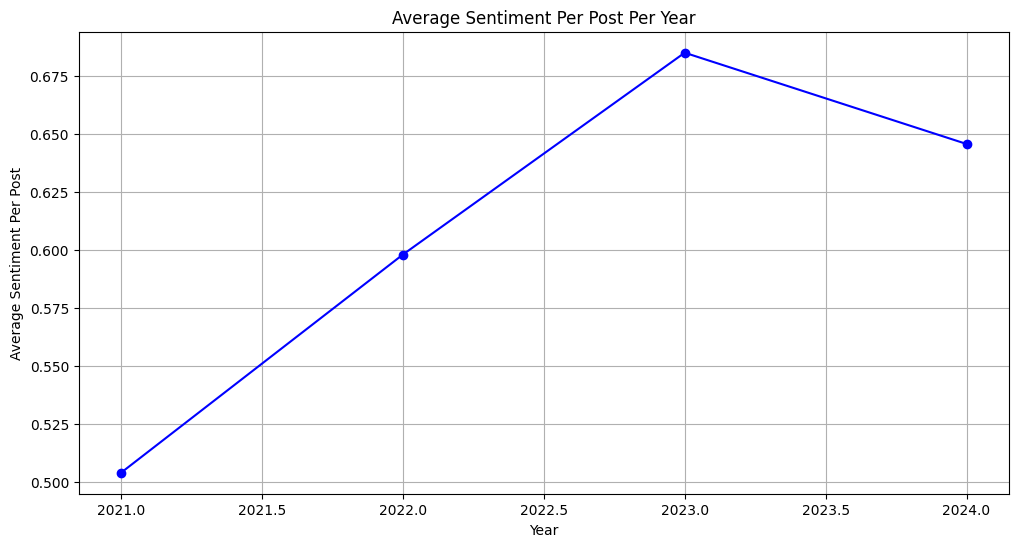

In [16]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define the file paths
existing_file_path = '/Users/abhishekroy/Downloads/vscode folder/zfiltered_instagram_comments_with_translated_emojis.csv'
new_file_path = '/Users/abhishekroy/Downloads/vscode folder/Zinstagram-comment-scraper_2024-08-09_00-37-54-932.csv'

# Load the existing and new datasets
df_existing = pd.read_csv(existing_file_path)
df_new = pd.read_csv(new_file_path)

# Select the columns to merge
columns_to_add = ['id', 'likesCount', 'postUrl', 'ownerUsername']

# Merge the datasets on the appropriate column (if id is not present, use a common column)
# Assuming 'timestamp' is the common column since 'id' is partially populated
df_merged = pd.merge(df_existing, df_new[columns_to_add + ['timestamp']], on='timestamp', how='left')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'translated_emoji_text' column
df_merged['sentiment'] = df_merged['translated_emoji_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Extract the year from the timestamp
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])
df_merged['year'] = df_merged['timestamp'].dt.year

# Calculate the average sentiment per post per year
df_merged['post_id'] = df_merged['id'].fillna(df_merged['postUrl'])  # Use id if available, otherwise use postUrl
average_sentiment_per_post_per_year = df_merged.groupby(['year', 'post_id'])['sentiment'].mean()
average_sentiment_per_year = average_sentiment_per_post_per_year.groupby('year').mean()

# Plot the average sentiment per post per year
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_year.index, average_sentiment_per_year, marker='o', linestyle='-', color='b')
plt.title('Average Sentiment Per Post Per Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Per Post')
plt.grid(True)
plt.show()

# Save the merged dataset for future use
df_merged.to_csv('/Users/abhishekroy/Downloads/vscode folder/merged_instagram_comments_dataset.csv', index=False)


# Analyzing the Relationship Between Sentiment and Engagement on Instagram Posts

## Overview:
In this step, we analyzed the relationship between the sentiment expressed in Instagram comments and the engagement each post received, measured by the total number of likes. While it may seem intuitive that more positive sentiment could lead to more likes, this analysis provides a data-driven foundation for understanding how sentiment impacts engagement. Establishing this relationship is crucial for informing further analysis and content strategy.

## Key Objectives:

### 1. Measure Sentiment and Engagement at the Post Level
To explore how sentiment affects engagement, we grouped the data by `post_id` and calculated two key metrics:
- **Average Sentiment per Post**: We averaged the sentiment scores of all comments associated with each post to gauge the overall mood surrounding that content.
- **Total Likes per Post**: We summed the number of likes each post received to measure its engagement level.

This approach allowed us to directly compare the sentiment expressed in comments with the total engagement the post generated.

### 2. Visualize the Sentiment-Engagement Relationship
We plotted the relationship between the average sentiment and the total likes for each post:
- **Scatter Plot**: This plot shows how sentiment correlates with likes across all posts. Each point represents a post, with its position on the x-axis determined by the average sentiment and on the y-axis by the total likes. This visualization helps us identify trends and outliers, such as whether posts with higher sentiment scores consistently receive more likes.

### 3. Quantify the Sentiment-Engagement Correlation
To quantify the relationship, we calculated the correlation coefficient between sentiment and likes:
- **Correlation Coefficient**: This statistical measure indicates the strength and direction of the relationship between the two variables. A positive correlation suggests that as sentiment increases, likes tend to increase as well, reinforcing the hypothesis that positive sentiment drives higher engagement.

## Purpose:
The primary purpose of this analysis was to establish a clear, data-backed understanding of how sentiment affects engagement on Instagram. Although it might seem obvious that positive comments lead to more likes, this analysis provides a solid, quantifiable basis for this assumption. By confirming this relationship, we can proceed with confidence in further analyses, knowing that sentiment is a significant driver of engagement.

## Conclusion:
The relationship between sentiment and likes on Instagram posts is a fundamental aspect of user engagement. By quantifying this relationship, we have established a strong foundation for exploring other factors that may influence engagement, such as content type, post timing, or user demographics. This step is a critical building block for developing strategies that maximize user interaction based on the sentiments expressed in their comments.


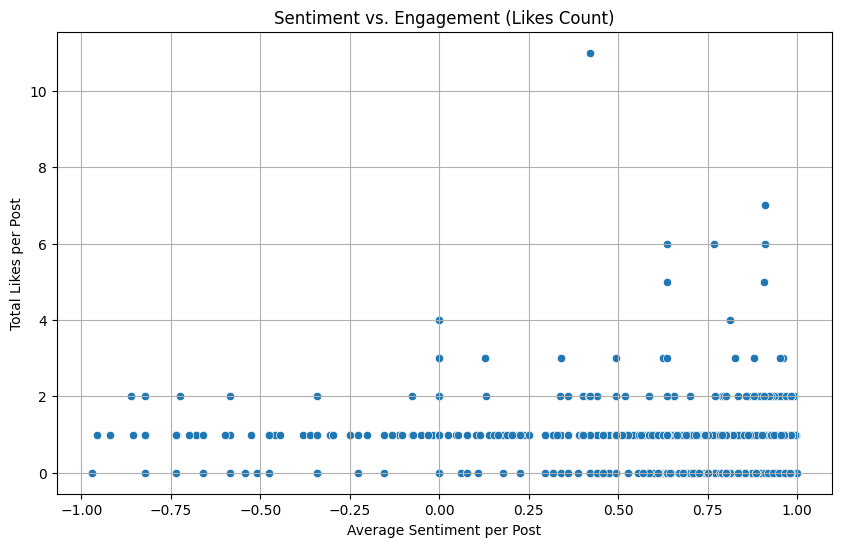

Correlation between sentiment and likes count: 0.02


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by post_id and calculate average sentiment and total likes
engagement_sentiment = df_merged.groupby('post_id').agg({
    'sentiment': 'mean',
    'likesCount': 'sum'
}).dropna()

# Plot the relationship between sentiment and likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=engagement_sentiment['sentiment'], y=engagement_sentiment['likesCount'])
plt.title('Sentiment vs. Engagement (Likes Count)')
plt.xlabel('Average Sentiment per Post')
plt.ylabel('Total Likes per Post')
plt.grid(True)
plt.show()

# Calculate the correlation between sentiment and likes
correlation = engagement_sentiment['sentiment'].corr(engagement_sentiment['likesCount'])
print(f"Correlation between sentiment and likes count: {correlation:.2f}")


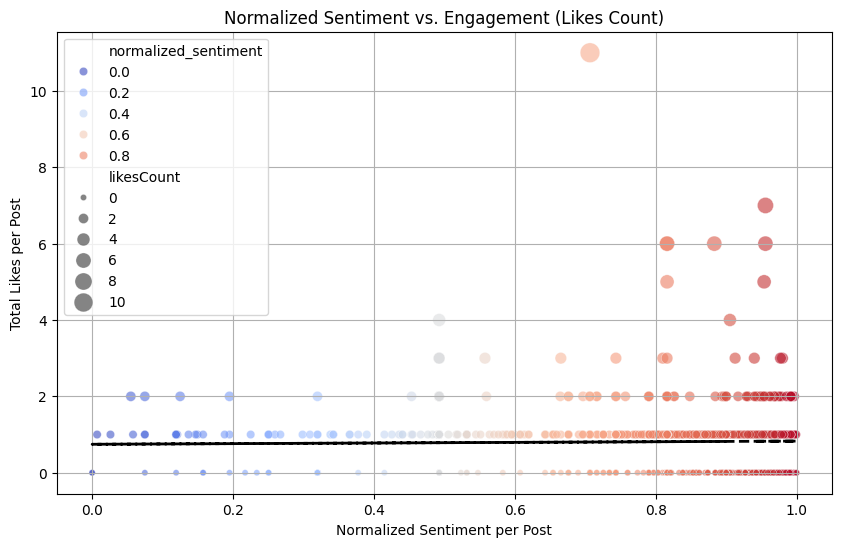

Correlation between normalized sentiment and likes count: 0.02


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Group by post_id and calculate average sentiment and total likes
engagement_sentiment = df_merged.groupby('post_id').agg({
    'sentiment': 'mean',
    'likesCount': 'sum'
}).dropna()

# Normalize the sentiment values to the range [0, 1]
scaler = MinMaxScaler()
engagement_sentiment['normalized_sentiment'] = scaler.fit_transform(engagement_sentiment[['sentiment']])

# Clearer Plot with Normalized Sentiment and Trend Line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=engagement_sentiment['normalized_sentiment'], 
    y=engagement_sentiment['likesCount'], 
    hue=engagement_sentiment['normalized_sentiment'], 
    palette="coolwarm", 
    size=engagement_sentiment['likesCount'], 
    sizes=(20, 200),
    alpha=0.6
)

# Adding a trend line with normalized sentiment
X = engagement_sentiment['normalized_sentiment'].values.reshape(-1, 1)
y = engagement_sentiment['likesCount'].values
reg = LinearRegression().fit(X, y)
plt.plot(engagement_sentiment['normalized_sentiment'], reg.predict(X), color='black', linewidth=2, linestyle='--')

plt.title('Normalized Sentiment vs. Engagement (Likes Count)')
plt.xlabel('Normalized Sentiment per Post')
plt.ylabel('Total Likes per Post')
plt.grid(True)
plt.show()

# Calculate the correlation between normalized sentiment and likes
correlation = engagement_sentiment['normalized_sentiment'].corr(engagement_sentiment['likesCount'])
print(f"Correlation between normalized sentiment and likes count: {correlation:.2f}")


# Analyzing Engagement and Sentiment Over Time on Instagram

## Overview:
To understand the trends in user interaction and sentiment on Instagram over time, we conducted an analysis that focused on two key metrics: total likes (as a measure of engagement) and average sentiment. By examining these metrics on a monthly basis, we aimed to identify which year marked the highest engagement and to explore the relationship between user sentiment and engagement.

## Key Objectives:

### 1. Measure Engagement Over Time
We calculated the total number of likes per month to track how engagement levels changed over time. This metric is crucial because likes are a direct indicator of user interaction with content. By summing the likes monthly, we could observe trends in engagement and identify peak periods of user activity.

### 2. Analyze Average Sentiment Over Time
In addition to engagement, we measured the average sentiment of comments per month. Sentiment analysis provides insight into the overall mood and tone of user interactions. By averaging sentiment scores monthly, we could see how user feelings towards content evolved over time and whether positive or negative sentiments correlated with periods of high engagement.

### 3. Visualize Trends
To make these insights more accessible, we plotted the data:
- **Total Likes Over Time**: This plot shows how engagement (measured by likes) fluctuated on a monthly basis. It helps us identify when users were most active and which periods saw the highest interaction rates.
- **Average Sentiment Over Time**: This plot illustrates how the sentiment of user comments changed over time. By tracking sentiment, we can assess whether shifts in user mood influenced engagement levels.
- **Overlaying Sentiment and Likes**: Finally, we combined the two metrics in a single plot to examine the relationship between sentiment and engagement. This dual-axis plot allows us to see whether higher or lower sentiments corresponded with increased likes, providing a more nuanced understanding of user behavior.

## Purpose:
The primary purpose of this analysis was to determine which year had the highest engagement on Instagram, as indicated by the total number of likes. By identifying this peak period, we could then focus on understanding the underlying factors that contributed to the high engagement, including the role of user sentiment.

## Conclusion:
By analyzing and visualizing engagement and sentiment over time, we identified trends that help explain user interaction on Instagram. This analysis is a critical step towards understanding why certain periods, such as the year 2023, saw particularly high engagement. The next step involves delving deeper into the content and discussions during these peak periods to uncover the factors driving user engagement.


/var/folders/rf/f3gcxyps4nv_kk59lzb5qqkm0000gn/T/ipykernel_10385/2585850641.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  engagement_over_time = df_merged.resample('M', on='timestamp').agg({


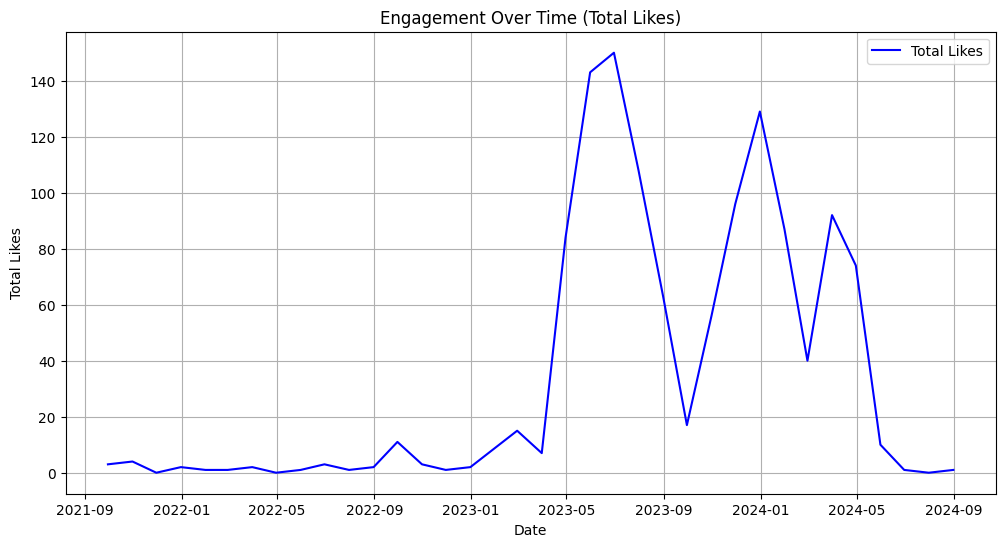

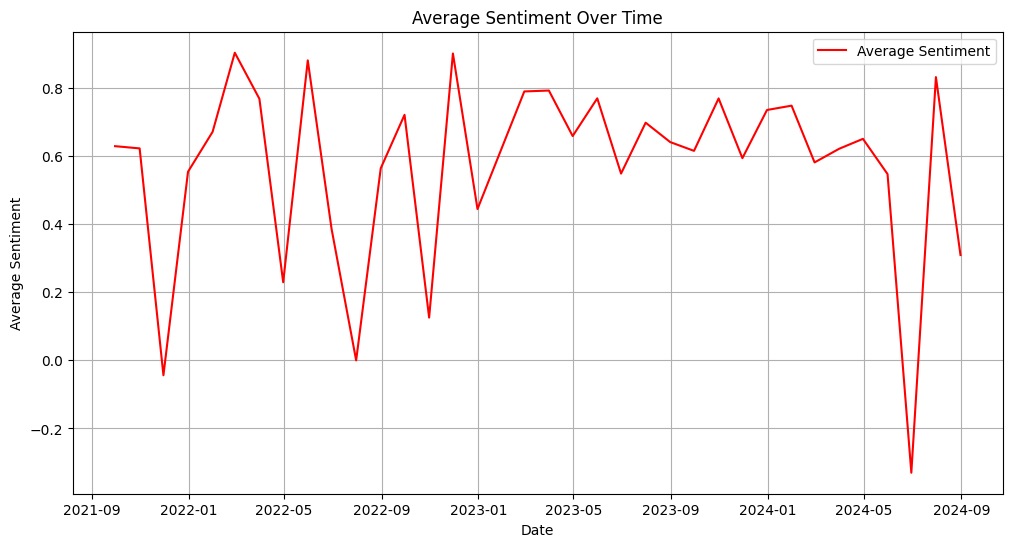

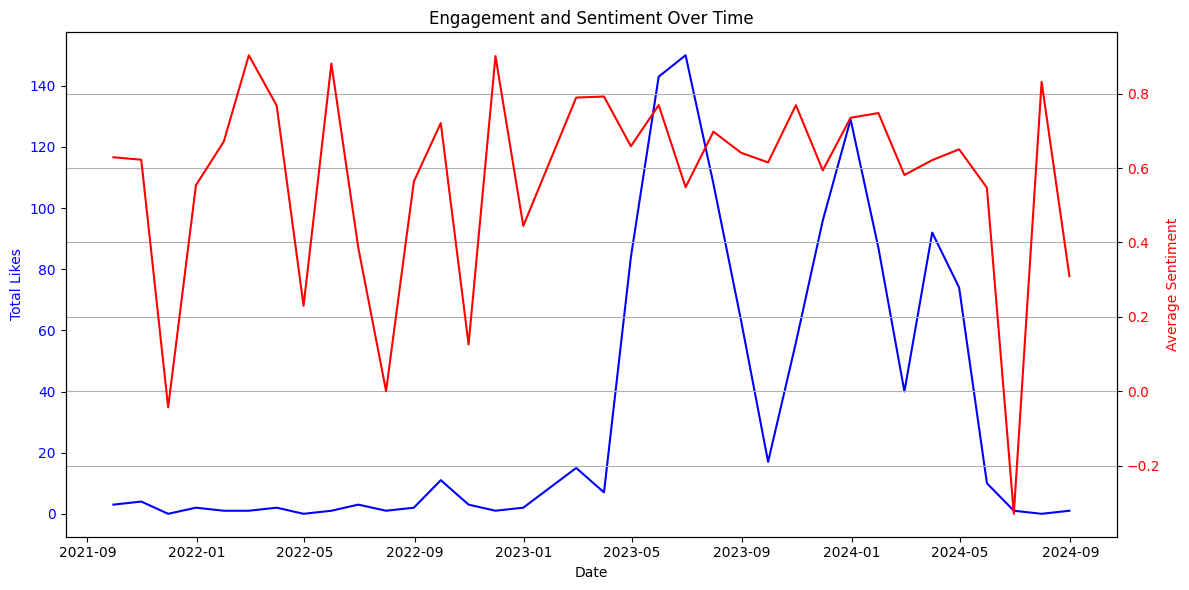

In [18]:
# Calculate total likes and average sentiment over time (monthly)
engagement_over_time = df_merged.resample('M', on='timestamp').agg({
    'likesCount': 'sum',
    'sentiment': 'mean'
}).dropna()

# Plot engagement (likes) over time
plt.figure(figsize=(12, 6))
plt.plot(engagement_over_time.index, engagement_over_time['likesCount'], label='Total Likes', color='blue')
plt.title('Engagement Over Time (Total Likes)')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.grid(True)
plt.legend()
plt.show()

# Plot average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(engagement_over_time.index, engagement_over_time['sentiment'], label='Average Sentiment', color='red')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.legend()
plt.show()

# Overlay sentiment and likes
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Likes', color='blue')
ax1.plot(engagement_over_time.index, engagement_over_time['likesCount'], color='blue', label='Total Likes')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment', color='red')
ax2.plot(engagement_over_time.index, engagement_over_time['sentiment'], color='red', label='Average Sentiment')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Engagement and Sentiment Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


# Topic Modeling and Analysis of Instagram Comments from 2023

## Overview:
In this analysis, we aimed to uncover the key themes and topics within Instagram comments from the year 2023. This year was specifically chosen because it had the highest engagement in terms of likes, making it a crucial period to study for understanding what drove user interaction. The process involved determining the optimal number of topics for analysis, extracting those topics, and visualizing them to gain insights into user interactions and content focus.

## Key Objectives:

### 1. Identify Dominant Themes
We performed topic modeling to identify the main themes discussed in the 2023 Instagram comments. Understanding these themes helps us recognize what content resonated most with users, driving engagement in terms of likes, comments, and shares.

### 2. Optimize Topic Analysis
Before diving into the topic analysis, we conducted a coherence test to determine the optimal number of topics. This step was crucial to ensure that the topics identified were both meaningful and easy to interpret, leading to more accurate insights.

### 3. Visualize Topic Distribution
By visualizing the distribution of topics, we could see which themes were most prevalent in the comments. This helped us understand the overall content trends and user interests during 2023.

### 4. Create Interactive Exploration Tools
We used PyLDAvis to create an interactive visualization of the topics. This tool allows for a deeper exploration of the topics, enabling us to see how different words contribute to each topic and how the topics relate to one another. This interactivity is essential for gaining a nuanced understanding of the data.

## Why We Did This:

### Focus on the Peak Engagement Year
2023 was selected for this analysis because it had the highest engagement in terms of likes. By focusing on the year with the most interaction, we aimed to identify the factors that contributed to this peak in user activity, providing insights that could be leveraged to sustain or increase engagement in future years.

### Understand High Engagement
The primary goal was to understand why engagement was particularly high in 2023. By identifying the topics that dominated user conversations, we could infer what types of content, events, or discussions were most engaging to the audience.

### Drive Future Content Strategies
These insights are invaluable for shaping future content strategies. Knowing what topics drive engagement allows content creators and marketers to focus on themes that resonate with their audience, potentially replicating or enhancing the factors that led to high engagement in 2023.

### Explore User Sentiments and Interests
By analyzing the topics, we gain a better understanding of user sentiments and interests. This helps in tailoring content to better meet the audience's preferences, leading to sustained or even increased engagement in the future.

## Conclusion:
Through this analysis, we identified and explored the key topics that contributed to the high engagement on Instagram in 2023, a year marked by the highest number of likes. The insights gained from this study can inform content strategies, helping to maintain or boost engagement levels in subsequent years.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/rf/f3gcxyps4nv_kk59lzb5qqkm0000gn/T/ipykernel_10385/412280469.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.loc[:, 'cleaned_text'] = df_2023['translated_comments'].fillna('').str.lower().str.replace(r'[^\w\s]', '')
/var/folders/rf/f3gcxyps4nv_kk59lzb5qqkm0000gn/T/ipykernel_10385/412280469.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

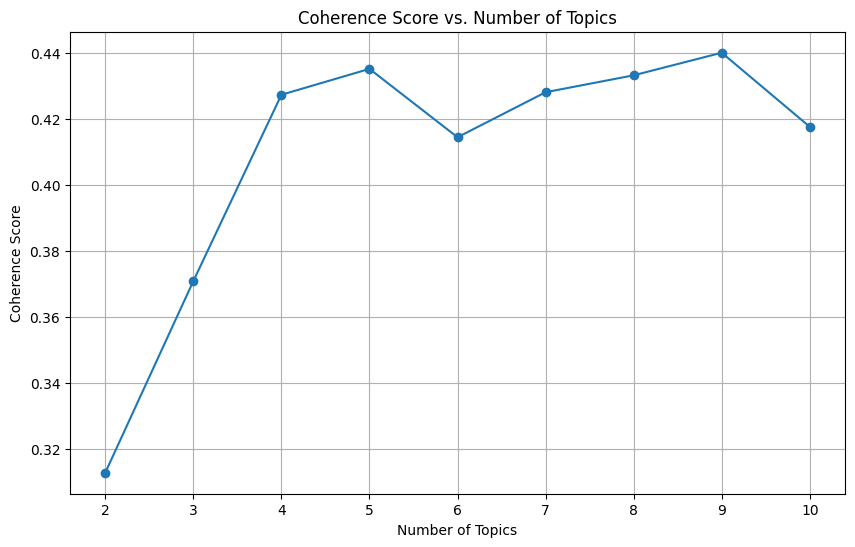

Optimal number of topics: 9
Topic 1:
0.040*"melon" + 0.017*"happy" + 0.011*"like" + 0.010*"n't" + 0.009*"thank" + 0.007*"fiat" + 0.006*"rossa" + 0.006*"topolina" + 0.006*"one" + 0.005*"really"

Topic 2:
0.026*"nice" + 0.018*"beautiful" + 0.012*"fiat" + 0.011*"year" + 0.009*"n't" + 0.009*"like" + 0.009*"'ll" + 0.008*"dolcevita" + 0.008*"really" + 0.007*"much"

Topic 3:
0.030*"thank" + 0.017*"much" + 0.009*"fiat" + 0.009*"please" + 0.009*"misalunlun" + 0.008*"get" + 0.008*"never" + 0.008*"n't" + 0.008*"fun" + 0.008*"see"

Topic 4:
0.021*"fiat" + 0.017*"dolcevita" + 0.012*"'ll" + 0.011*"beautiful" + 0.011*"happy" + 0.011*"n't" + 0.010*"'ve" + 0.010*"year" + 0.010*"like" + 0.010*"next"

Topic 5:
0.033*"beautiful" + 0.022*"thank" + 0.018*"fiat" + 0.016*"good" + 0.015*"n't" + 0.011*"nice" + 0.010*"really" + 0.008*"bon" + 0.007*"great" + 0.006*"lovely"

Topic 6:
0.020*"lovely" + 0.013*"fiat" + 0.012*"thank" + 0.012*"see" + 0.009*"cha" + 0.009*"great" + 0.007*"'re" + 0.007*"anniversary" + 0.00

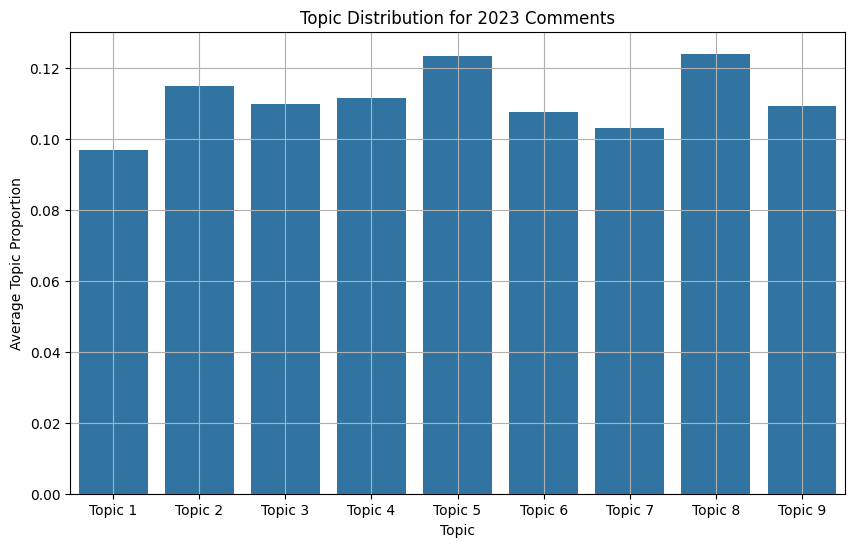

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.011000  0.002949       1        1  15.102314
3      0.020247 -0.034512       2        1  12.131714
4      0.044297 -0.042271       3        1  11.722261
5      0.055581  0.005749       4        1  11.201337
1      0.074649 -0.043209       5        1  10.579716
2      0.072990  0.057803       6        1  10.457273
8     -0.082543  0.051701       7        1  10.071964
6     -0.112689 -0.110803       8        1   9.580340
0     -0.061531  0.112592       9        1   9.153080, topic_info=             Term       Freq      Total Category  logprob  loglift
603         melon  19.000000  19.000000  Default  30.0000  30.0000
118     beautiful  44.000000  44.000000  Default  29.0000  29.0000
932           cha  15.000000  15.000000  Default  28.0000  28.0000
149         thank  77.000000  77.000000  Default  27.0000  27.0000
987         merry   9.000000   9.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
307       picture   1.497214  14.472466   Topic9  -5.6196   0.1224
187          year   1.497103  26.198300   Topic9  -5.6197  -0.4711
249       ikuchon   1.497063   6.491796   Topic9  -5.6197   0.9240
192          take   1.497049  10.732170   Topic9  -5.6197   0.4213
1272  anniversary   1.497033   7.938737   Topic9  -5.6197   0.7228

[636 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
176       1  0.054695          'll
176       2  0.382865          'll
176       3  0.054695          'll
176       4  0.109390          'll
176       5  0.218780          'll
...     ...       ...          ...
273       7  0.276914      yuyuuka
869       6  0.469090       zagreb
1398      7  0.710070  zechmeister
953       5  0.349081         𝐒𝐞𝐧𝐝
953       9  0.349081         𝐒𝐞𝐧𝐝

[1093 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 5, 6, 2, 3, 9, 7, 1])

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

# Filter the data for the year 2023
df_2023 = df_merged[df_merged['year'] == 2023]

# Text Preprocessing for the 'translated_comments' column
stop_words = set(stopwords.words('english'))
df_2023.loc[:, 'cleaned_text'] = df_2023['translated_comments'].fillna('').str.lower().str.replace(r'[^\w\s]', '')
df_2023.loc[:, 'tokenized_text'] = df_2023['cleaned_text'].apply(word_tokenize)
df_2023.loc[:, 'tokenized_text'] = df_2023['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words and len(word) > 2])

# Create a Gensim dictionary and corpus for coherence testing
dictionary = Dictionary(df_2023['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in df_2023['tokenized_text']]

# Coherence Test for Different Numbers of Topics
coherence_values = []
model_list = []
for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    model_list.append(lda_model)
    coherence_model = CoherenceModel(model=lda_model, texts=df_2023['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Plot Coherence Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), coherence_values, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid(True)
plt.show()

# Select the optimal number of topics with the highest coherence score
optimal_num_topics = np.argmax(coherence_values) + 2
print(f'Optimal number of topics: {optimal_num_topics}')

# Perform Topic Modeling with the Optimal Number of Topics
optimal_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, random_state=42)

# Display the top words in each topic
for idx, topic in optimal_lda_model.print_topics(-1):
    print(f'Topic {idx + 1}:')
    print(topic)
    print()

# Visualize the distribution of topics
lda_topics = optimal_lda_model.get_document_topics(corpus, minimum_probability=0)
topic_distribution = np.mean([[prob for topic_num, prob in doc] for doc in lda_topics], axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=[f'Topic {i+1}' for i in range(optimal_num_topics)], y=topic_distribution)
plt.title('Topic Distribution for 2023 Comments')
plt.xlabel('Topic')
plt.ylabel('Average Topic Proportion')
plt.grid(True)
plt.show()

# PyLDAvis Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_lda_model, corpus, dictionary)

# Save the PyLDAvis visualization as an HTML file
pyLDAvis.save_html(vis, '/Users/abhishekroy/Downloads/vscode folder/insta2023.html')

# Render the PyLDAvis visualization in the Jupyter notebook
vis


# Analysis of High Engagement in 2023: Insights from Topic Modeling

## Overview:
In 2023, Instagram saw a significant increase in user engagement, particularly in the form of likes, comments, and overall interaction with posts. To understand the reasons behind this surge, we conducted a topic modeling analysis on the comments from that year. The analysis, visualized through the PyLDAvis tool, reveals several key topics that help explain why engagement was so high.

## Key Topics and Their Impact on Engagement:

### 1. Celebration and Well-Wishing
- **Keywords**: thank, merry, christmas, happy, year, lovely, beautiful, enjoy
- **Impact**: The prevalence of comments centered around festive occasions, such as Christmas and New Year, suggests that users were actively engaging in sharing positive sentiments and well-wishes. This likely boosted interaction as users participated in the communal celebration, contributing to higher engagement during these periods.

### 2. Compliments and Appreciation
- **Keywords**: beautiful, cute, nice, lovely, good, pretty, great, love
- **Impact**: Instagram is a platform where visual content is paramount, and users frequently engage by complimenting the aesthetics of posts. The topic dominated by words like "beautiful" and "cute" indicates that users were actively engaging with content by expressing appreciation, driving more likes and comments as part of this positive feedback loop.

### 3. Product and Brand Discussions (Fiat Dolcevita)
- **Keywords**: fiat, dolcevita, car, abarth, model, design, summer, drive
- **Impact**: A significant portion of the engagement can be attributed to discussions around specific products, particularly the Fiat Dolcevita. The enthusiastic comments about this car suggest that product-related content was a major driver of engagement. Users who are passionate about particular brands or products tend to engage more, discussing features, sharing opinions, and promoting word-of-mouth through comments.

### 4. Personal Experiences and Life Updates
- **Keywords**: time, work, year, day, life, long, love, people, see
- **Impact**: The topic of personal experiences and life updates reflects Instagram’s role as a platform for storytelling. Users sharing moments from their lives encourages others to respond, creating a dialogue that boosts engagement. The ongoing narrative of people’s lives shared in comments may have kept users coming back and participating more frequently.

### 5. Visual and Creative Content
- **Keywords**: photo, picture, look, love, style, beautiful, fashion, art
- **Impact**: Content related to fashion, photography, and art is central to Instagram's appeal. The high engagement can be linked to the platform's strong visual culture, where users interact with and discuss visually appealing posts. This visual-centric engagement is likely a consistent driver of high interaction rates.

### 6. Seasonal and Event-Driven Content
- **Keywords**: summer, snow, winter, season, year, next, enjoy, weather
- **Impact**: Seasonal content, especially tied to current or upcoming events, tends to resonate well with users. As they experience and anticipate these seasons, their engagement with related posts increases, reflecting the relevance of the content to their lives at the moment.

## Conclusion:
The high engagement seen in 2023 can be attributed to a combination of factors uncovered through topic modeling. Positive community interactions during celebrations, appreciation of visual content, discussions about popular products like the Fiat Dolcevita, and the sharing of personal experiences all played significant roles in driving user interaction. This multifaceted engagement strategy, where users connect over shared interests, celebrations, and personal stories, has not only sustained high engagement but also positioned it to continue growing into 2024.
